<a href="https://colab.research.google.com/github/Hannanbutt1256/ML_Project/blob/main/ML_Project_HannanButt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [267]:
# Imported all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Loan.csv')

In [269]:
# .T used to take transpose of daat frame so I see data in all columns
df.T



,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
ApplicationDate,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2072-09-24,2072-09-25,2072-09-26,2072-09-27,2072-09-28,2072-09-29,2072-09-30,2072-10-01,2072-10-02,2072-10-03
Age,45,38,47,58,37,37,58,49,34,46,...,54,34,50,50,51,44,56,44,60,20
AnnualIncome,39948,39709,40724,69084,103264,178310,51250,97345,116841,40615,...,96264,60433,34282,30578,33354,30180,49246,48958,41025,53227
CreditScore,617,628,570,545,594,626,564,516,603,612,...,621,555,578,588,562,587,567,645,560,574
EmploymentStatus,Employed,Employed,Employed,Employed,Employed,Self-Employed,Employed,Employed,Employed,Employed,...,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate,Master,High School,High School,Bachelor,Associate,...,Bachelor,High School,High School,Bachelor,High School,High School,Associate,Bachelor,High School,Associate
Experience,22,15,26,34,17,16,39,23,12,19,...,28,10,27,29,30,19,33,20,36,0
LoanAmount,13152,26045,17627,37898,9184,15433,12741,19634,55353,25443,...,38031,11299,28489,14654,22082,24521,25818,37033,14760,32055
LoanDuration,48,48,36,96,36,72,48,12,60,12,...,48,60,48,48,36,36,36,72,72,48
MaritalStatus,Married,Single,Married,Single,Married,Married,Married,Divorced,Divorced,Married,...,Single,Married,Single,Single,Single,Married,Married,Married,Married,Married


To Check datatypes and null values

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [271]:
df['ApplicationDate'].duplicated().sum()
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])

df.groupby(df['ApplicationDate'].dt.year).size()


,0
ApplicationDate,
2018,365
2019,365
2020,366
2021,365
2022,365
2023,365
2024,366
2025,365
2026,365


After seeing the data in our `ApplicationDate` column and viewing the problem statement I came to a decision that this column should be dropped completely

**Reasons**



1.   Data seems to be artificially generated as it has excatly one application for each day from year 2018 to 2072
2.   The first point gives us clue to next point that how could we have future dates
3.   Also our problem statement doesnot require us to find something like which year has the most poll of application or affect of some policy on applications volume

I think these reasons are enough to exclude it from data completely....



In [272]:
df = df.drop(columns=['ApplicationDate'])


In [273]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
Age,45,38,47,58,37,37,58,49,34,46,...,54,34,50,50,51,44,56,44,60,20
AnnualIncome,39948,39709,40724,69084,103264,178310,51250,97345,116841,40615,...,96264,60433,34282,30578,33354,30180,49246,48958,41025,53227
CreditScore,617,628,570,545,594,626,564,516,603,612,...,621,555,578,588,562,587,567,645,560,574
EmploymentStatus,Employed,Employed,Employed,Employed,Employed,Self-Employed,Employed,Employed,Employed,Employed,...,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate,Master,High School,High School,Bachelor,Associate,...,Bachelor,High School,High School,Bachelor,High School,High School,Associate,Bachelor,High School,Associate
Experience,22,15,26,34,17,16,39,23,12,19,...,28,10,27,29,30,19,33,20,36,0
LoanAmount,13152,26045,17627,37898,9184,15433,12741,19634,55353,25443,...,38031,11299,28489,14654,22082,24521,25818,37033,14760,32055
LoanDuration,48,48,36,96,36,72,48,12,60,12,...,48,60,48,48,36,36,36,72,72,48
MaritalStatus,Married,Single,Married,Single,Married,Married,Married,Divorced,Divorced,Married,...,Single,Married,Single,Single,Single,Married,Married,Married,Married,Married
NumberOfDependents,2,1,2,1,1,0,0,5,5,4,...,2,3,3,0,1,3,5,3,3,0


**These all are for checking inconsistency in experience columns**

In [274]:
display(df[df['Experience'] > df['Age']])
display(df[df['Experience'] == df['Age']])
display(df[df['Experience'] > (df['Age'] - 18)])



,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


Here I seperated continuous numeric and categorical columns

In [275]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


This to check overal column values ranges and inconsistencies of categorical columns

In [276]:
for col in df:
    values = np.sort(df[col].unique())
    print(f"{col} : {values}")

Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]
AnnualIncome : [ 15000  15004  15005 ... 373724 422480 485341]
CreditScore : [343 362 372 380 381 382 383 384 385 387 388 389 392 393 394 396 397 398
 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416
 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434
 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470
 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488
 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506
 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524
 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542
 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 55

Checked for duplicate in the whole data frame..

In [277]:
df.duplicated().sum()



np.int64(0)

# Assumptions

Assumptions I have for data was that data could have inconsitency in categorical columns like same category with different written format.

Simmilarly I checked for data duplication but found none..



Fun addition:

The data seems too clean. It makes me wonder either it is totally fake or very well collected and here goes everything fishy.

After some research and better utilization of LLM Icame to know that typically `TotalDebtToIncomeRatio` should between 0 to 1 according to LLM. But after some more digging find out that it could be 3 or 5.

Let me explain if someone has debt payments that are half of its income then we will say that it has `TotalDebtToIncomeRatio` of **0.5**. Now if someone has debt greater than its income then it could be 3 meaning the debt that person has is 200 percent more than his/her income

In [278]:
invalid_dti = df[
    (df['TotalDebtToIncomeRatio'] < 0) |
    (df['TotalDebtToIncomeRatio'] > 1)
]

invalid_dti.T


,11,26,65,67,74,79,85,91,204,222,...,19787,19793,19826,19839,19843,19923,19927,19955,19966,19989
Age,34,26,56,52,18,18,33,51,23,48,...,22,40,25,18,18,37,20,28,47,35
AnnualIncome,15000,15059,18248,32418,15000,40050,29096,31251,17270,35187,...,36513,43812,15000,29234,21403,21463,15000,15000,18136,24219
CreditScore,591,462,574,647,570,545,570,596,593,574,...,563,615,586,486,600,539,578,572,646,601
EmploymentStatus,Employed,Employed,Employed,Employed,Employed,Self-Employed,Employed,Unemployed,Employed,Employed,...,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed
EducationLevel,Bachelor,Associate,Associate,Bachelor,Associate,Doctorate,Associate,Bachelor,High School,Bachelor,...,High School,Bachelor,High School,High School,Master,Associate,Bachelor,Associate,Master,High School
Experience,11,0,37,29,0,0,12,30,0,24,...,0,20,0,0,0,12,0,4,21,11
LoanAmount,30088,20240,16443,32208,50226,112253,40138,66582,28352,82538,...,51781,60938,32186,47328,41405,29186,27201,21277,49304,19175
LoanDuration,24,24,24,12,48,48,24,24,36,48,...,24,12,24,24,48,60,60,24,72,12
MaritalStatus,Married,Single,Divorced,Married,Married,Married,Married,Single,Single,Married,...,Single,Divorced,Married,Divorced,Married,Married,Single,Divorced,Single,Single
NumberOfDependents,2,3,0,2,1,1,3,0,2,1,...,0,3,0,0,3,2,1,0,2,0


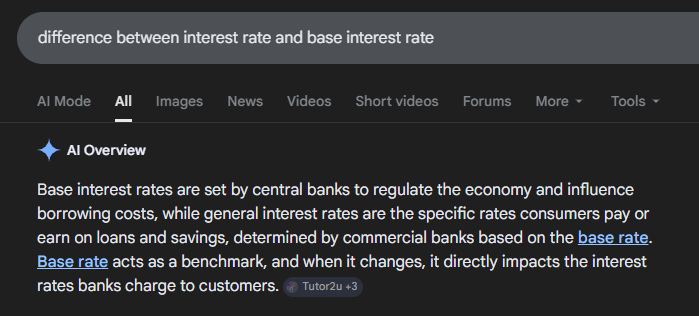

So simply means that base interest rate cannot be higher then the interest rate.
But our data has atleast 10,000 rows out of 20,000 where we have this data inconsistency

so the only option we have is to remove both these columns

And one more thing removing these columns dont cause data loss as these columns are not the decision making one's these are the post decision one's.

Think of it like we will first decide wether to give loan or not then it will be decided that loan should be given or not.

Similarly there is another column that is `MonthlyLoanPayment` It is also post decison columns Monthly loan payment will be calculated after the loan is approved and interest rate is decided

In [279]:
display(df[df['BaseInterestRate'] > df['InterestRate']])


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
6,58,51250,564,Employed,High School,39,12741,48,Married,0,...,4270.833333,0.884275,5,21730,0.225741,0.205271,391.300352,0.170529,0,50.0
7,49,97345,516,Employed,High School,23,19634,12,Divorced,5,...,8112.083333,0.933492,5,38621,0.226634,0.209113,1827.360055,0.260767,1,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,34,60433,555,Employed,High School,10,11299,60,Married,3,...,5036.083333,0.755652,5,82320,0.238799,0.226940,316.540575,0.144466,1,42.4
19993,50,30578,588,Employed,Bachelor,29,14654,48,Single,0,...,2548.166667,0.889639,3,3445,0.215654,0.188936,437.333829,0.225391,0,60.0
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0


In [280]:
df.groupby('LoanApproved')['MonthlyLoanPayment'].describe()


,count,mean,std,min,25%,50%,75%,max
LoanApproved,,,,,,,,
0,15220.0,981.268113,718.462106,103.153018,534.413446,791.221206,1201.465195,10892.629520
1,4780.0,689.799237,442.536568,97.030193,405.667630,576.034806,831.431571,5677.679354


The strong relation of Loan Amount with MonthlyLoanPayment suggest that it is a post -decision calculated value

In [281]:
df[['LoanAmount', 'InterestRate', 'LoanDuration', 'MonthlyLoanPayment']].corr()


,LoanAmount,InterestRate,LoanDuration,MonthlyLoanPayment
LoanAmount,1.000000,0.322824,-0.000436,0.780828
InterestRate,0.322824,1.000000,0.487994,0.127497
LoanDuration,-0.000436,0.487994,1.000000,-0.385495
MonthlyLoanPayment,0.780828,0.127497,-0.385495,1.000000


Also Removed `RiskScore` as it is out of the scope of our Problem Statement

In [282]:
numerical_cols = numerical_cols.drop(
    ['InterestRate', 'BaseInterestRate', 'MonthlyLoanPayment', 'RiskScore']
)


In [283]:
display(df[numerical_cols].T)
display(df[categorical_cols].T)

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
Age,45.000000,38.000000,47.000000,58.000000,37.000000,37.000000,58.000000,49.000000,34.000000,46.000000,...,54.000000,34.000000,50.000000,50.000000,51.000000,44.000000,56.000000,44.000000,60.000000,20.000000
AnnualIncome,39948.000000,39709.000000,40724.000000,69084.000000,103264.000000,178310.000000,51250.000000,97345.000000,116841.000000,40615.000000,...,96264.000000,60433.000000,34282.000000,30578.000000,33354.000000,30180.000000,49246.000000,48958.000000,41025.000000,53227.000000
CreditScore,617.000000,628.000000,570.000000,545.000000,594.000000,626.000000,564.000000,516.000000,603.000000,612.000000,...,621.000000,555.000000,578.000000,588.000000,562.000000,587.000000,567.000000,645.000000,560.000000,574.000000
Experience,22.000000,15.000000,26.000000,34.000000,17.000000,16.000000,39.000000,23.000000,12.000000,19.000000,...,28.000000,10.000000,27.000000,29.000000,30.000000,19.000000,33.000000,20.000000,36.000000,0.000000
LoanAmount,13152.000000,26045.000000,17627.000000,37898.000000,9184.000000,15433.000000,12741.000000,19634.000000,55353.000000,25443.000000,...,38031.000000,11299.000000,28489.000000,14654.000000,22082.000000,24521.000000,25818.000000,37033.000000,14760.000000,32055.000000
LoanDuration,48.000000,48.000000,36.000000,96.000000,36.000000,72.000000,48.000000,12.000000,60.000000,12.000000,...,48.000000,60.000000,48.000000,48.000000,36.000000,36.000000,36.000000,72.000000,72.000000,48.000000
NumberOfDependents,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000,4.000000,...,2.000000,3.000000,3.000000,0.000000,1.000000,3.000000,5.000000,3.000000,3.000000,0.000000
MonthlyDebtPayments,183.000000,496.000000,902.000000,755.000000,274.000000,732.000000,337.000000,288.000000,638.000000,704.000000,...,341.000000,411.000000,435.000000,137.000000,190.000000,673.000000,414.000000,512.000000,986.000000,272.000000
CreditCardUtilizationRate,0.354418,0.087827,0.137414,0.267587,0.320535,0.102211,0.367380,0.209768,0.192701,0.512465,...,0.309016,0.485318,0.405505,0.563849,0.271351,0.101288,0.471818,0.216596,0.364758,0.536411
NumberOfOpenCreditLines,1.000000,5.000000,2.000000,2.000000,0.000000,5.000000,6.000000,5.000000,3.000000,3.000000,...,1.000000,3.000000,2.000000,5.000000,1.000000,5.000000,2.000000,3.000000,4.000000,3.000000


,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
EmploymentStatus,Employed,Employed,Employed,Employed,Employed,Self-Employed,Employed,Employed,Employed,Employed,...,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate,Master,High School,High School,Bachelor,Associate,...,Bachelor,High School,High School,Bachelor,High School,High School,Associate,Bachelor,High School,Associate
MaritalStatus,Married,Single,Married,Single,Married,Married,Married,Divorced,Divorced,Married,...,Single,Married,Single,Single,Single,Married,Married,Married,Married,Married
HomeOwnershipStatus,Own,Mortgage,Rent,Mortgage,Mortgage,Rent,Rent,Mortgage,Own,Other,...,Rent,Mortgage,Mortgage,Mortgage,Own,Rent,Rent,Mortgage,Own,Own
LoanPurpose,Home,Debt Consolidation,Education,Home,Debt Consolidation,Debt Consolidation,Other,Other,Debt Consolidation,Other,...,Home,Home,Debt Consolidation,Auto,Home,Auto,Debt Consolidation,Home,Debt Consolidation,Other


In [284]:
df[numerical_cols].describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,TotalDebtToIncomeRatio,LoanApproved
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4946.052150,1782.555100,9.696440e+04,3.625241e+04,4891.715521,0.799918,5.002650,7.229432e+04,0.402182,0.239000
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,6604.887477,2245.378812,1.207999e+05,4.725151e+04,3296.771598,0.120665,2.236804,1.179200e+05,0.338924,0.426483
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,73.000000,24.000000,2.098000e+03,3.720000e+02,1250.000000,0.259203,0.000000,1.000000e+03,0.016043,0.000000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,1541.750000,551.000000,3.118025e+04,1.119675e+04,2629.583333,0.727379,3.000000,8.734750e+03,0.179693,0.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,2986.000000,1116.000000,6.069900e+04,2.220300e+04,4034.750000,0.820962,5.000000,3.285550e+04,0.302711,0.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,5873.250000,2126.000000,1.174052e+05,4.314650e+04,6163.000000,0.892333,6.000000,8.882550e+04,0.509214,0.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,200089.000000,52572.000000,2.619627e+06,1.417302e+06,25000.000000,0.999433,16.000000,2.603208e+06,4.647657,1.000000


In [285]:
df[categorical_cols].describe()

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000
unique,3,5,4,4,5
top,Employed,Bachelor,Married,Mortgage,Home
freq,17036,6054,10041,7939,5925


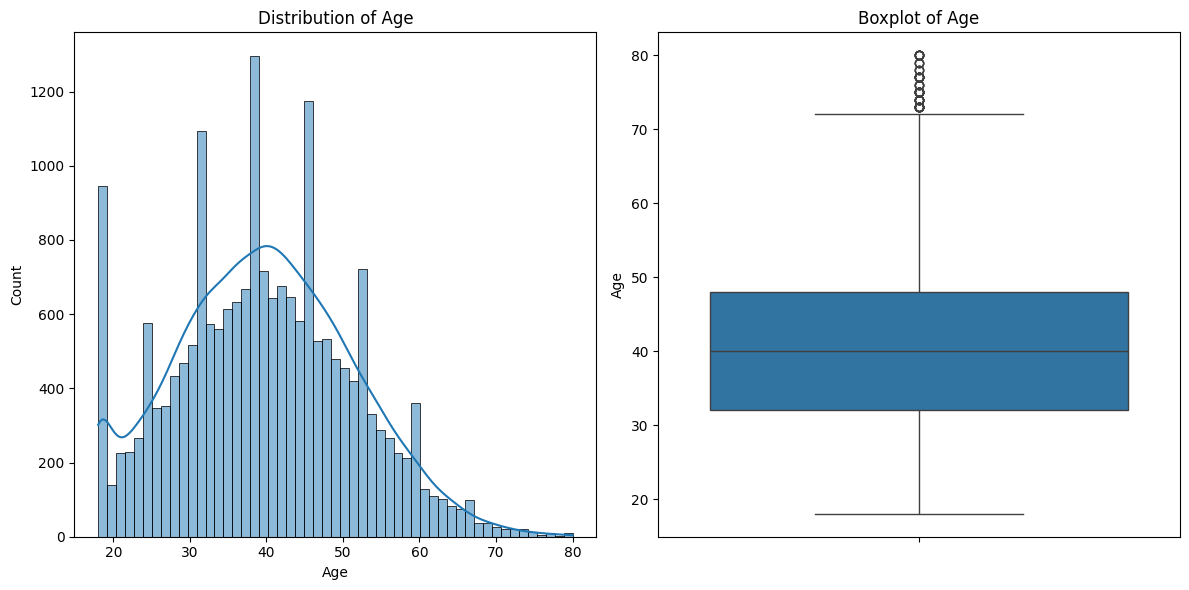

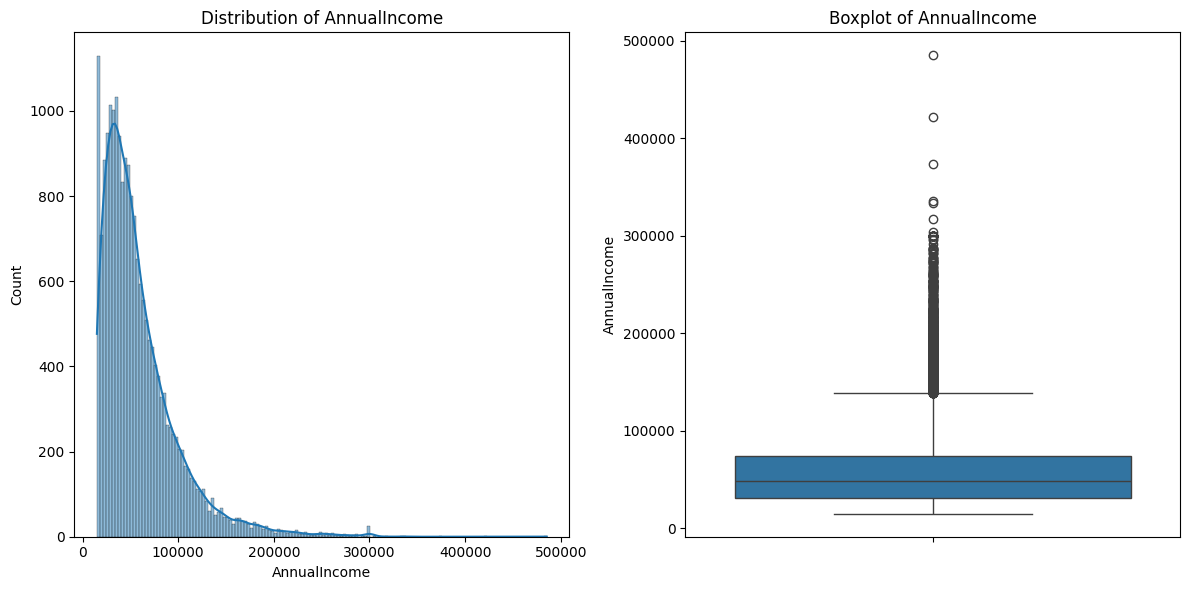

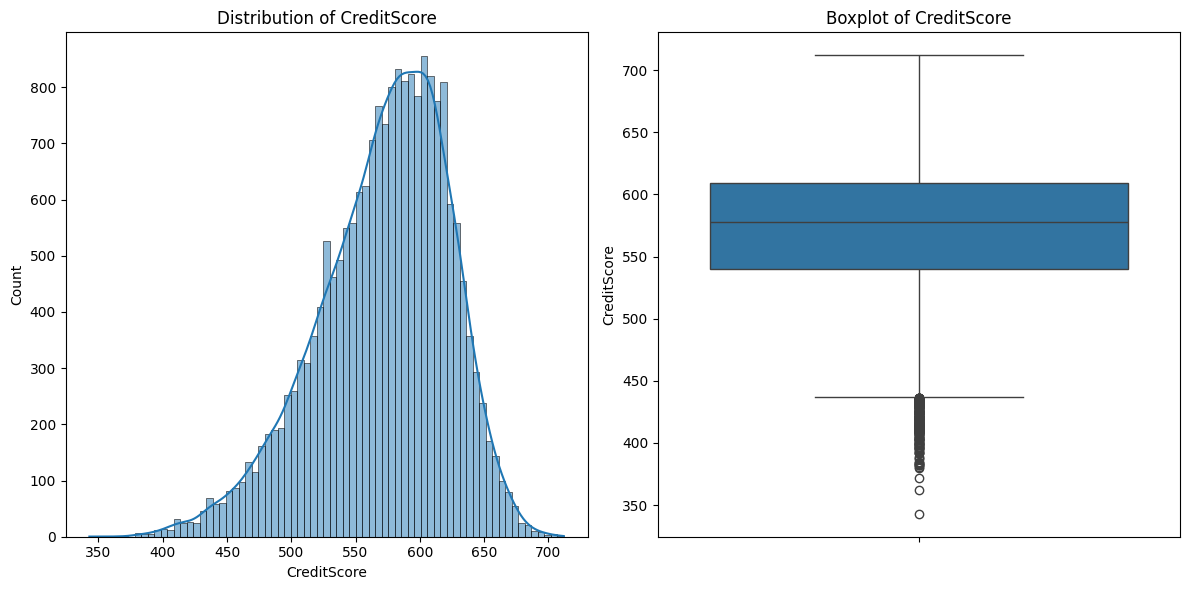

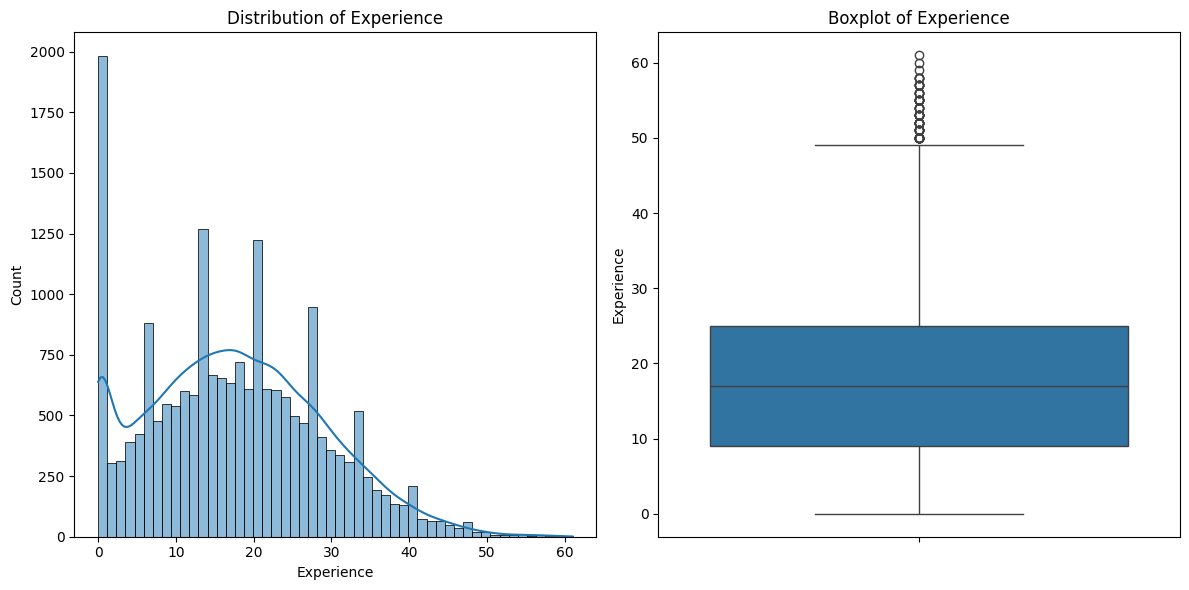

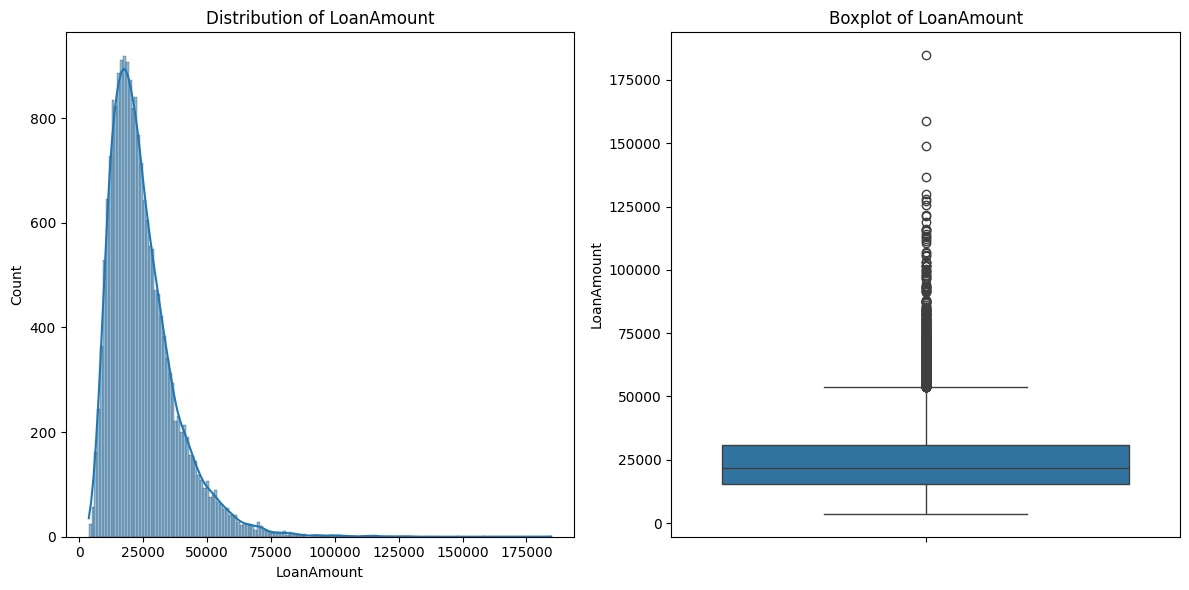

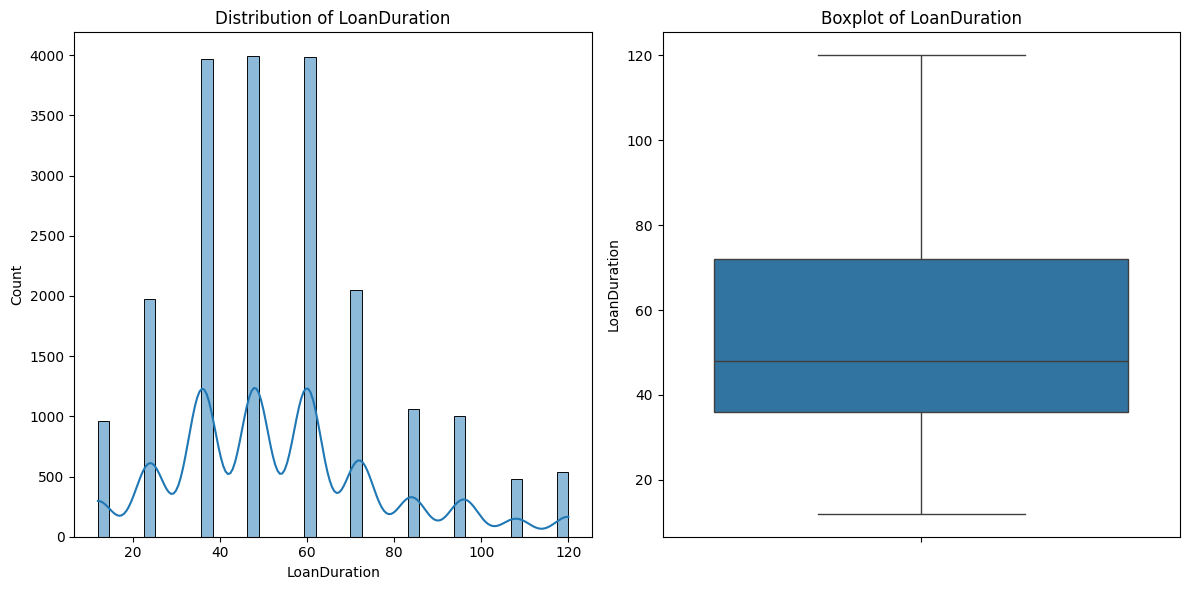

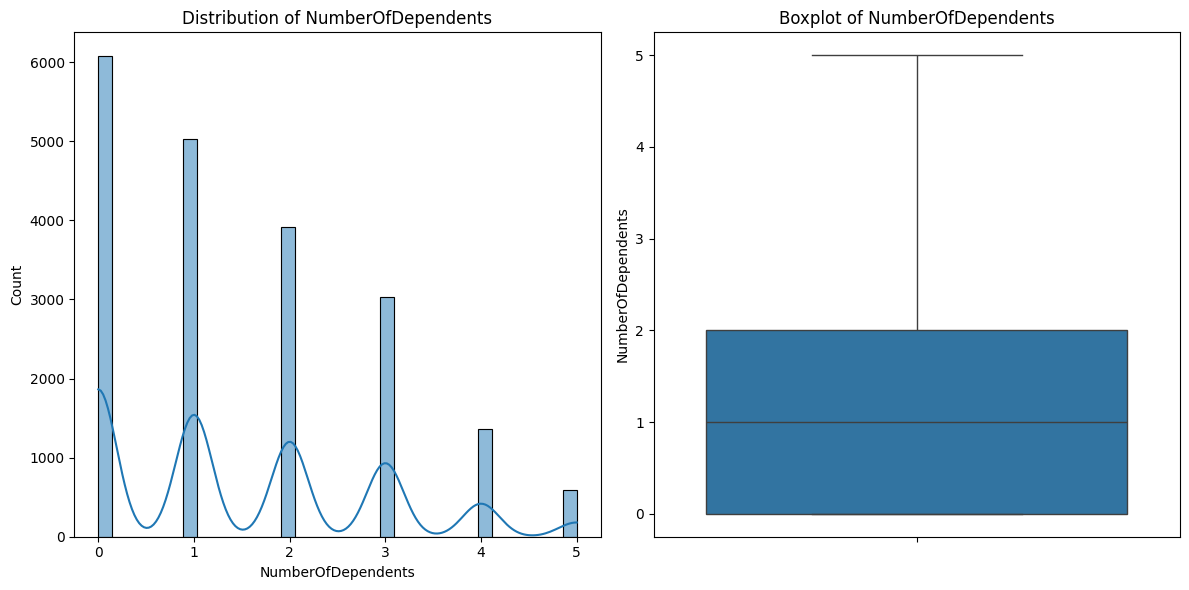

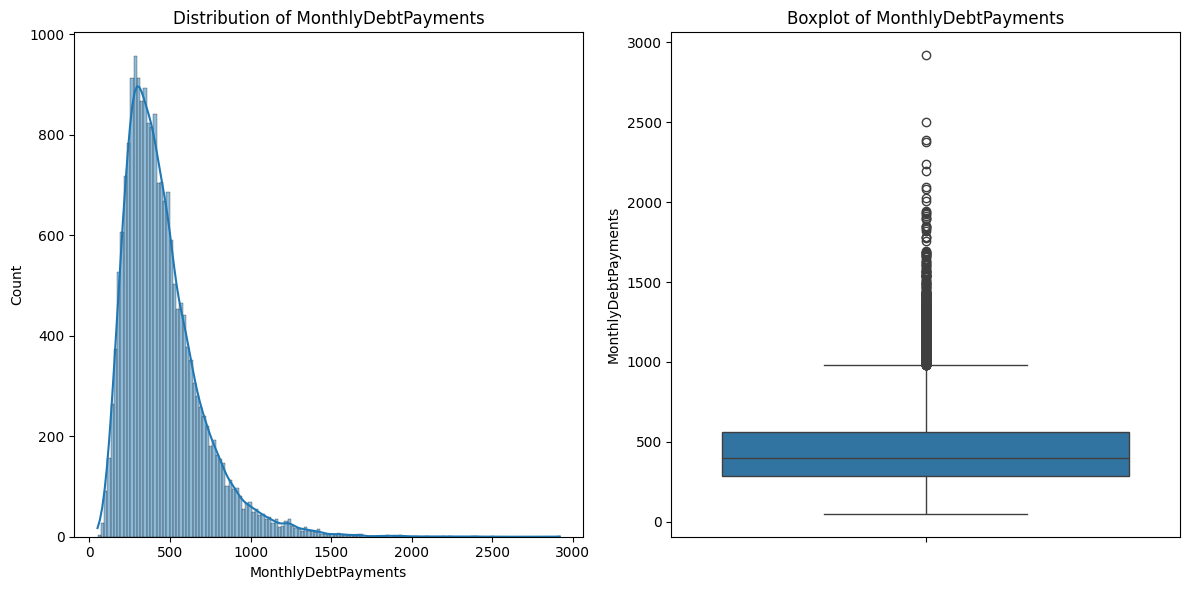

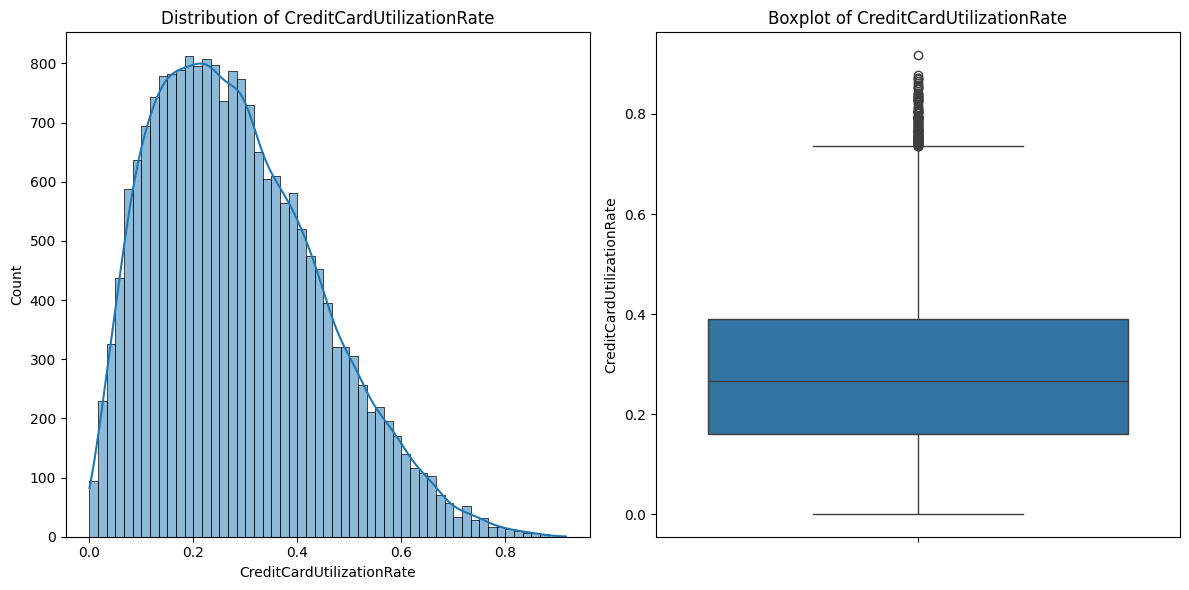

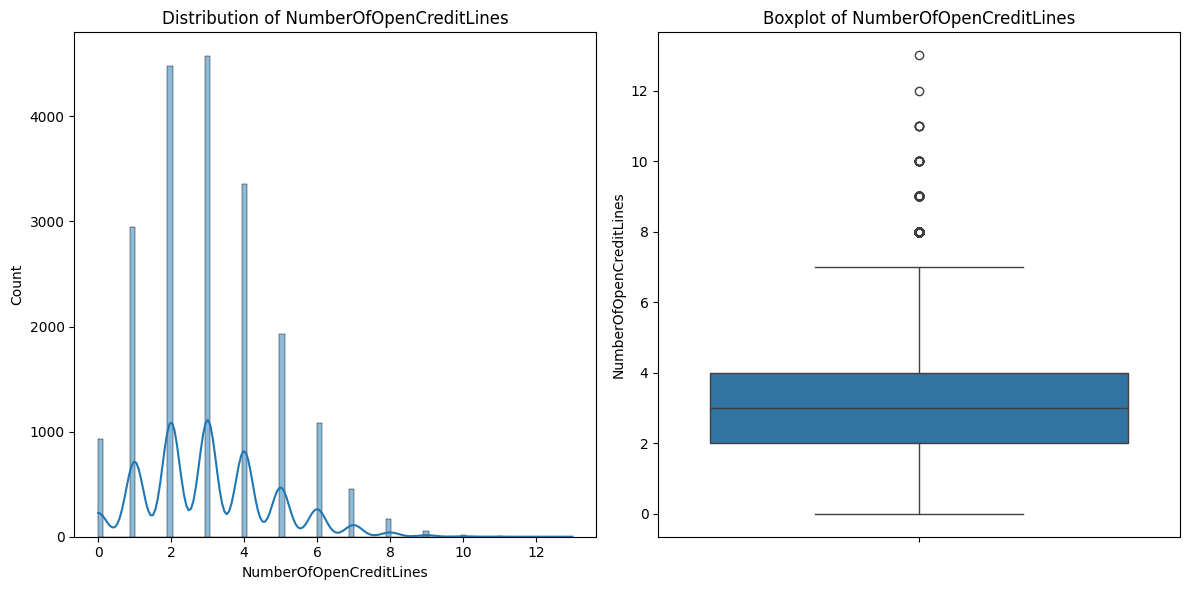

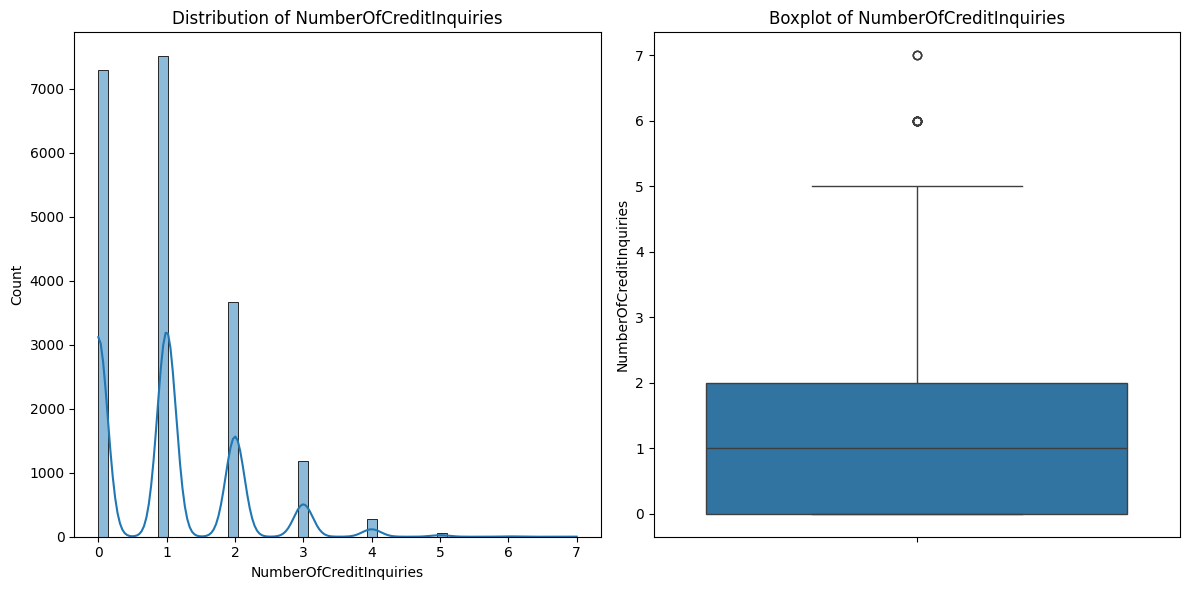

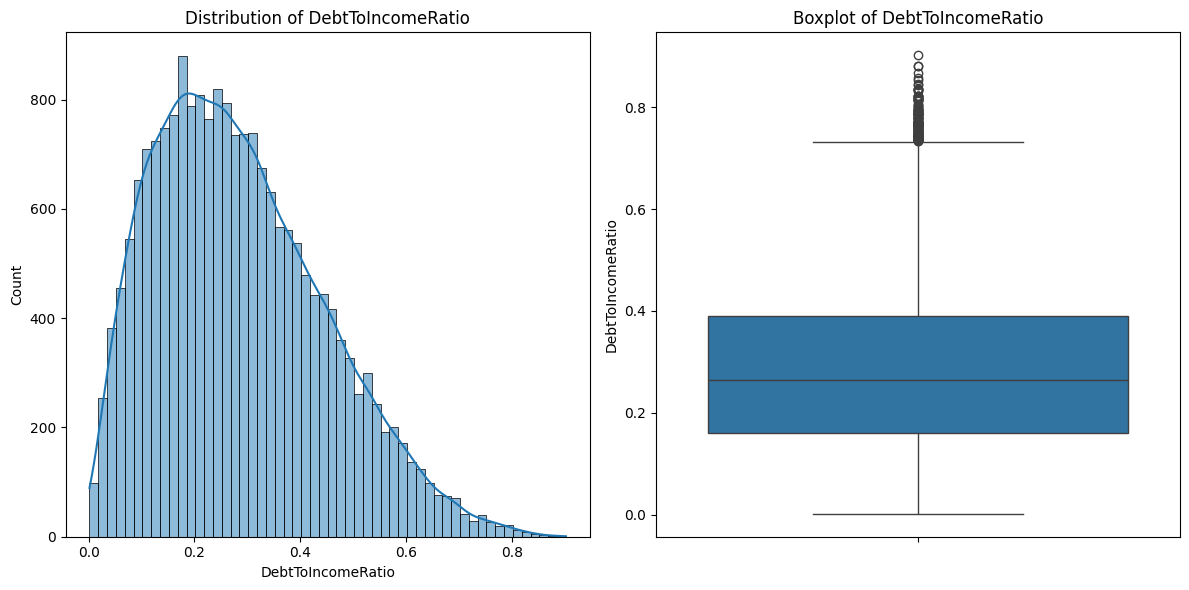

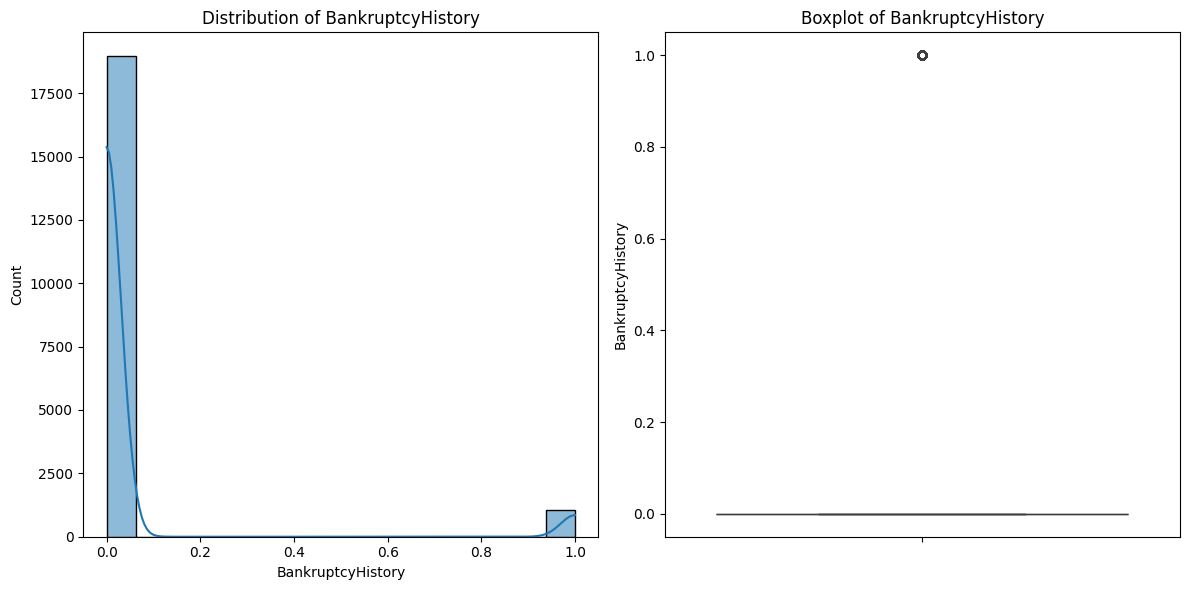

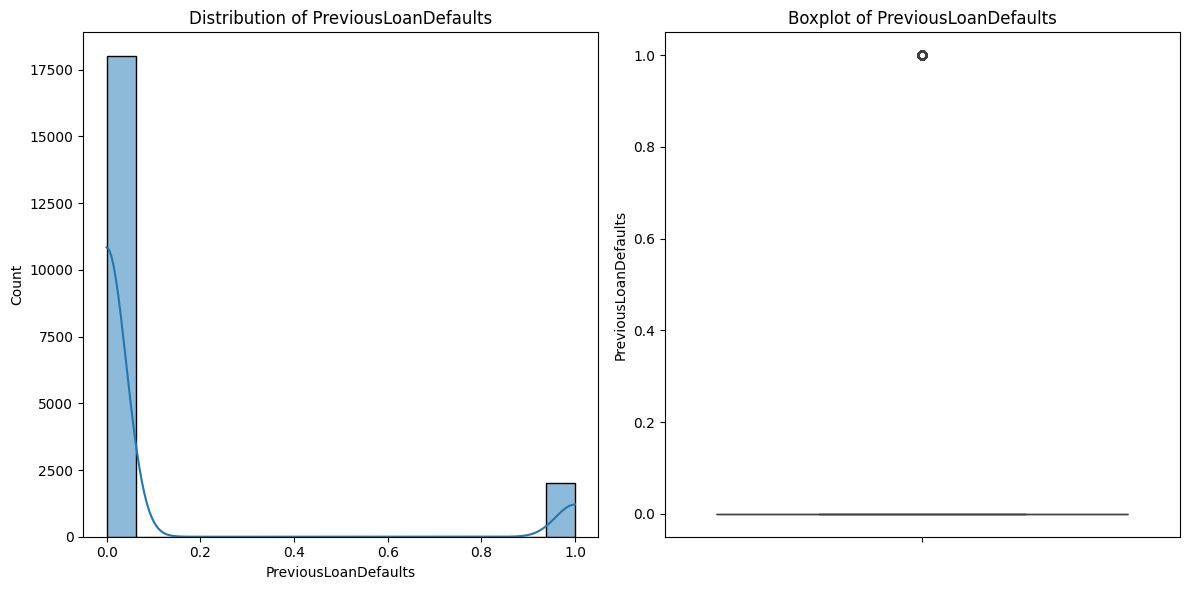

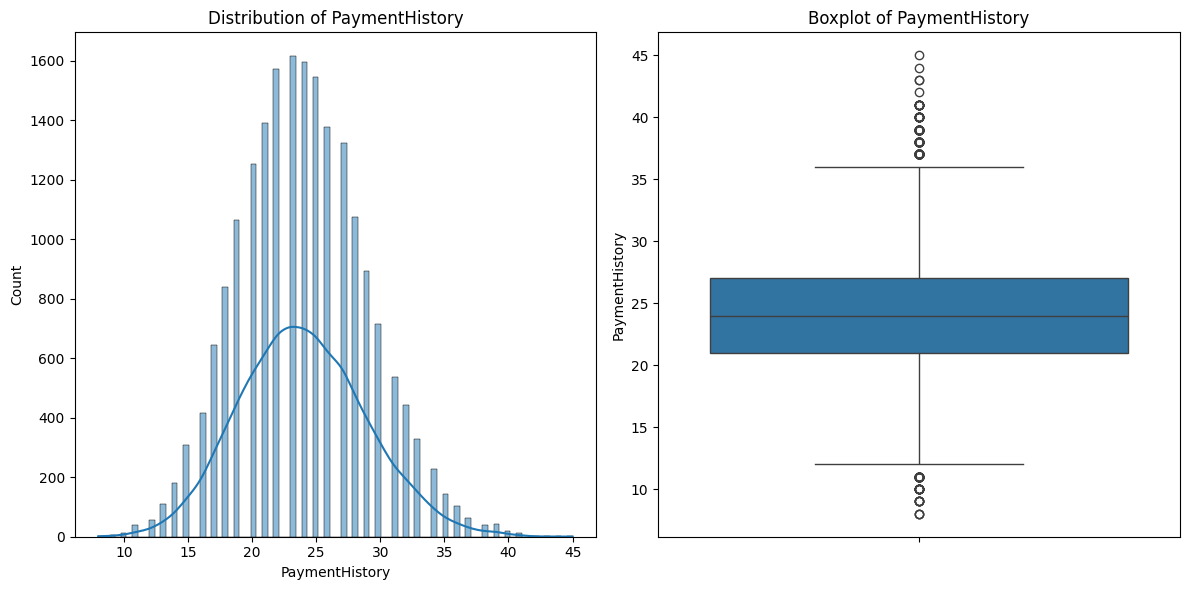

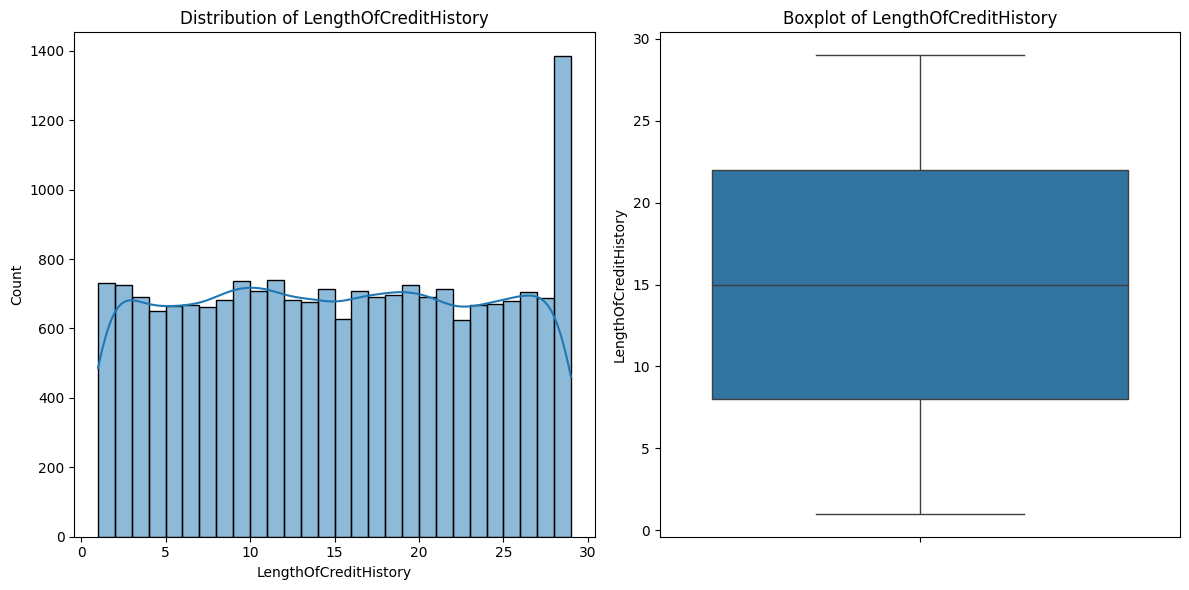

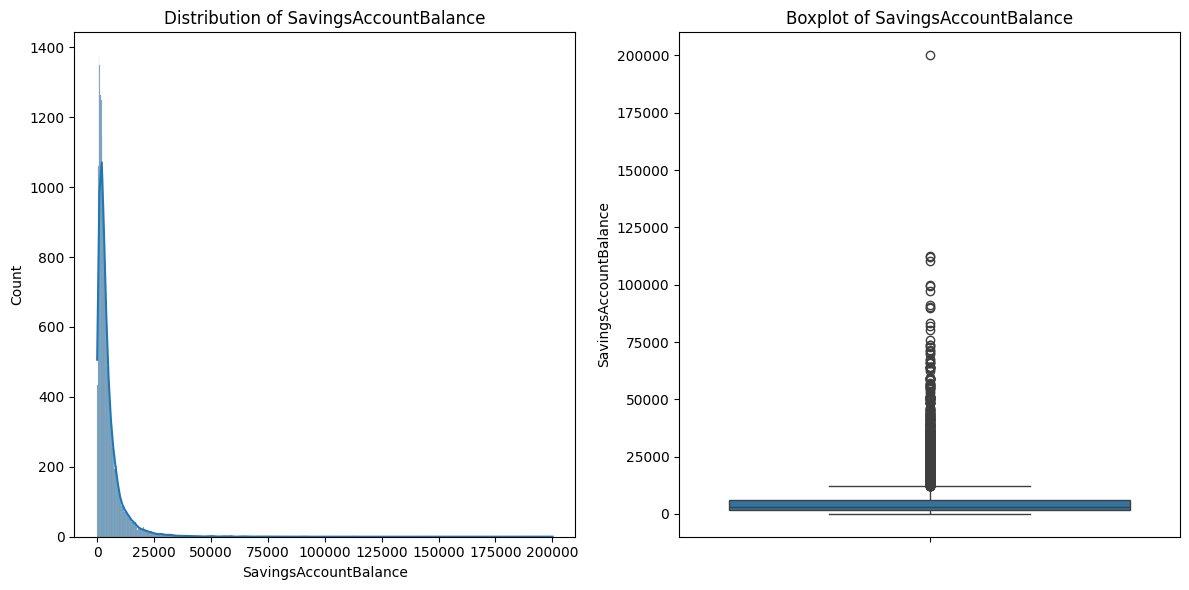

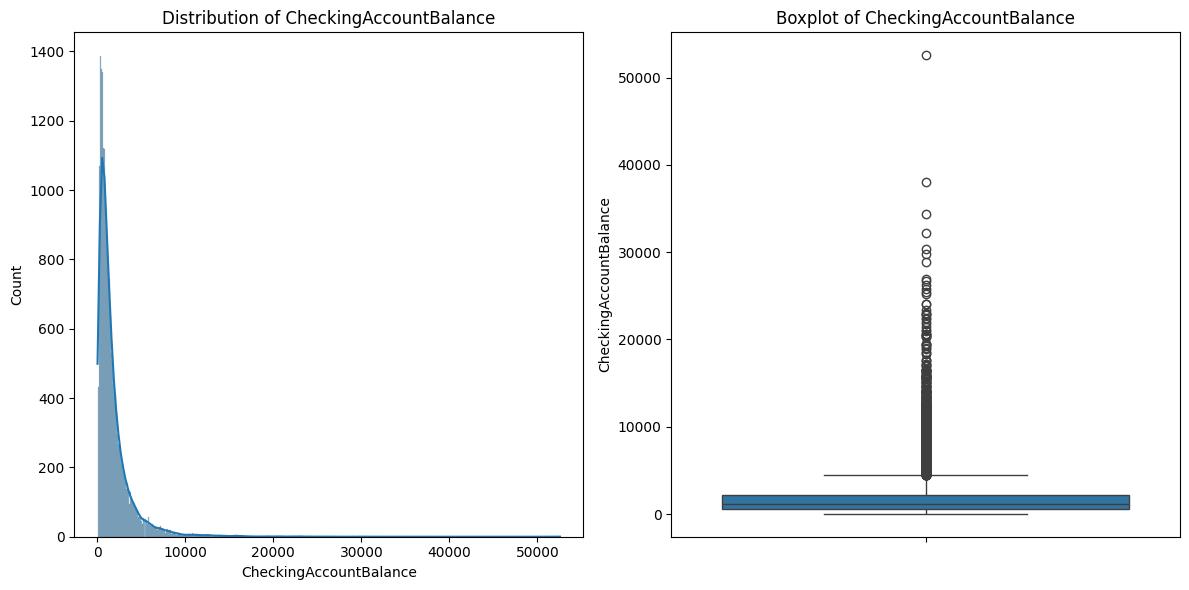

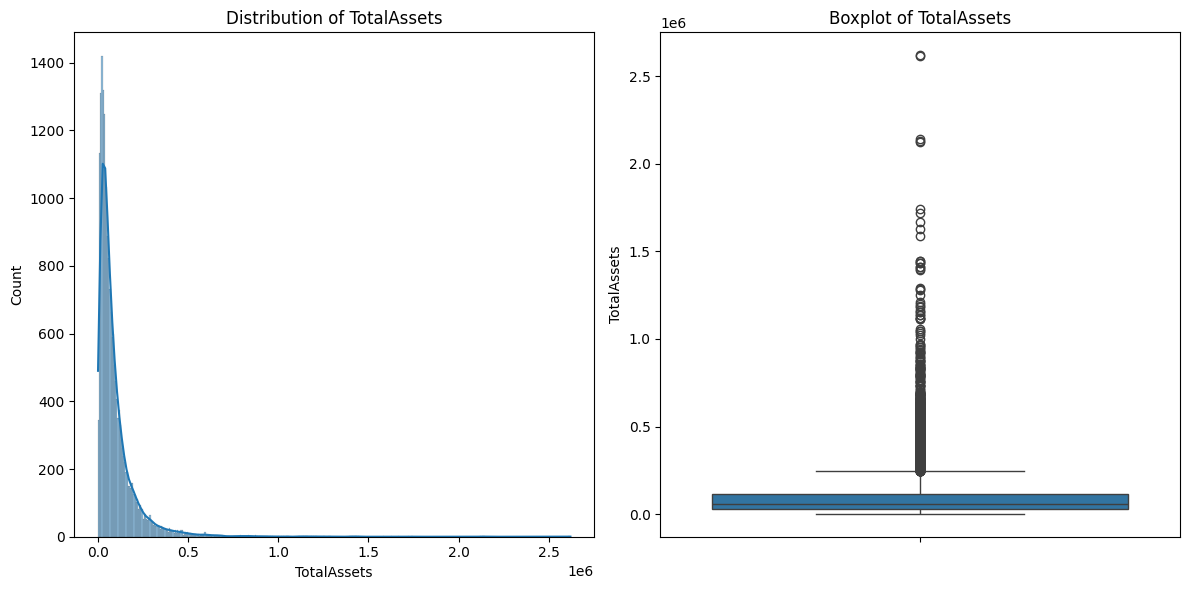

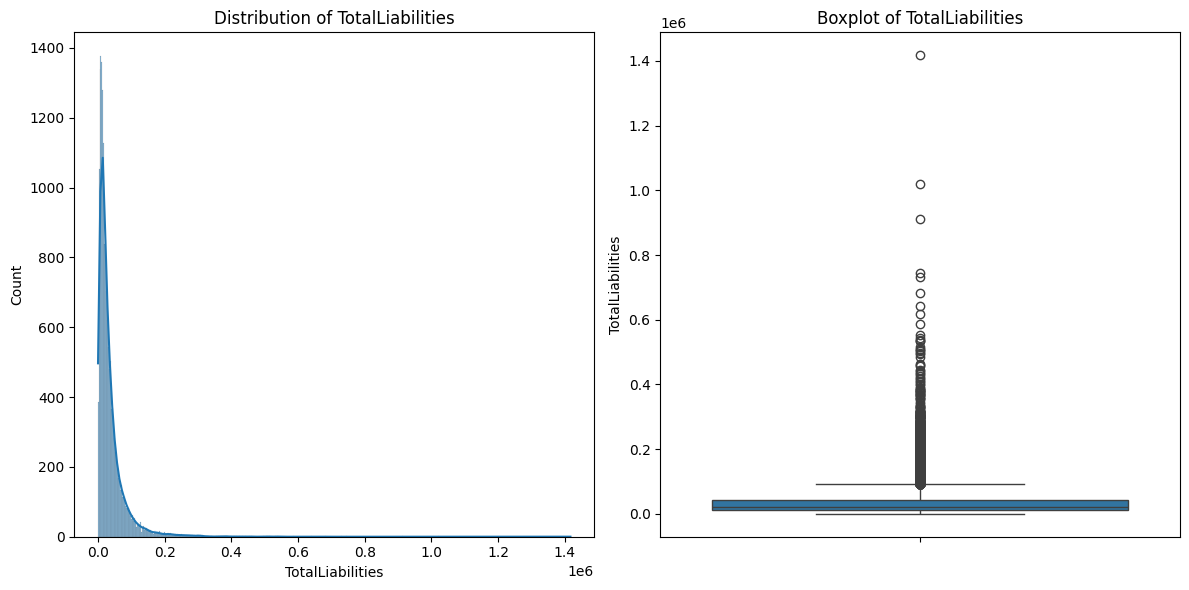

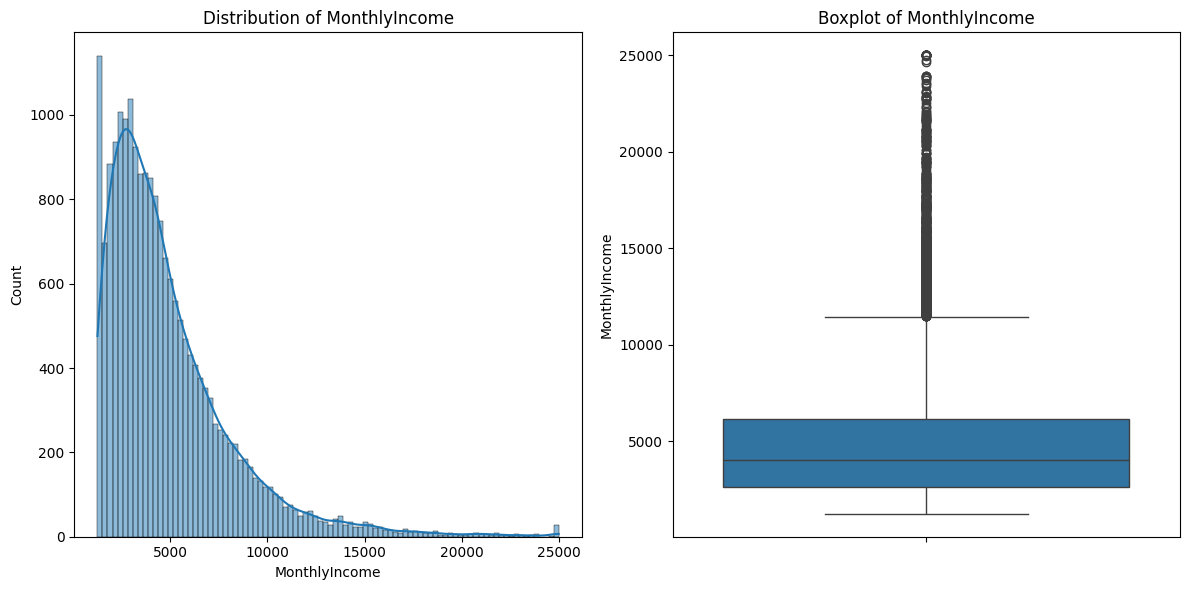

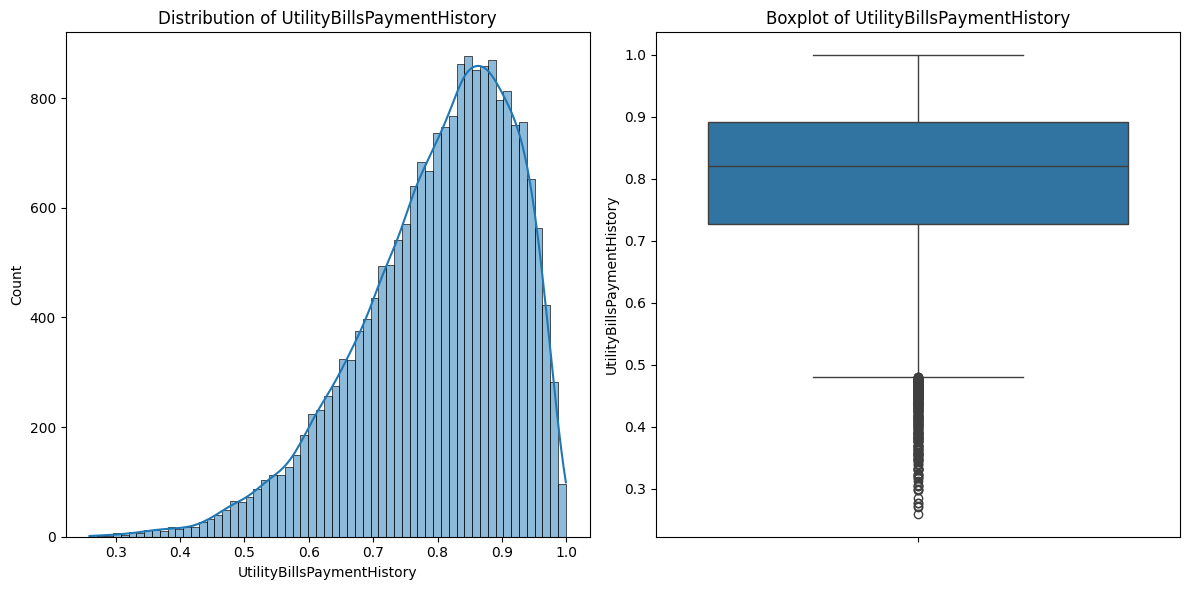

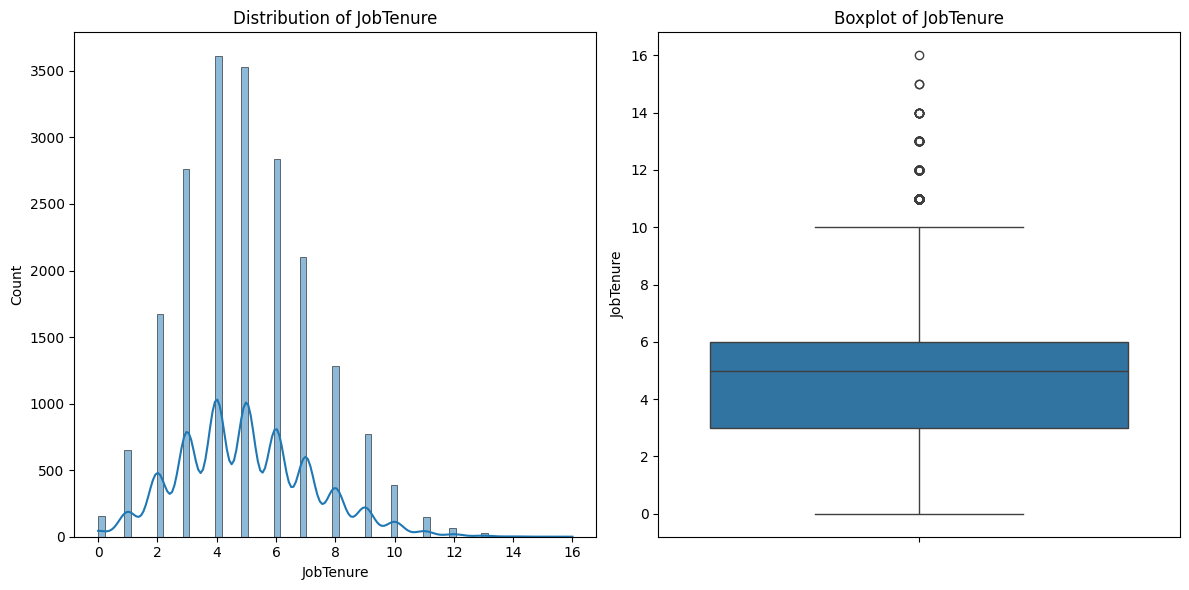

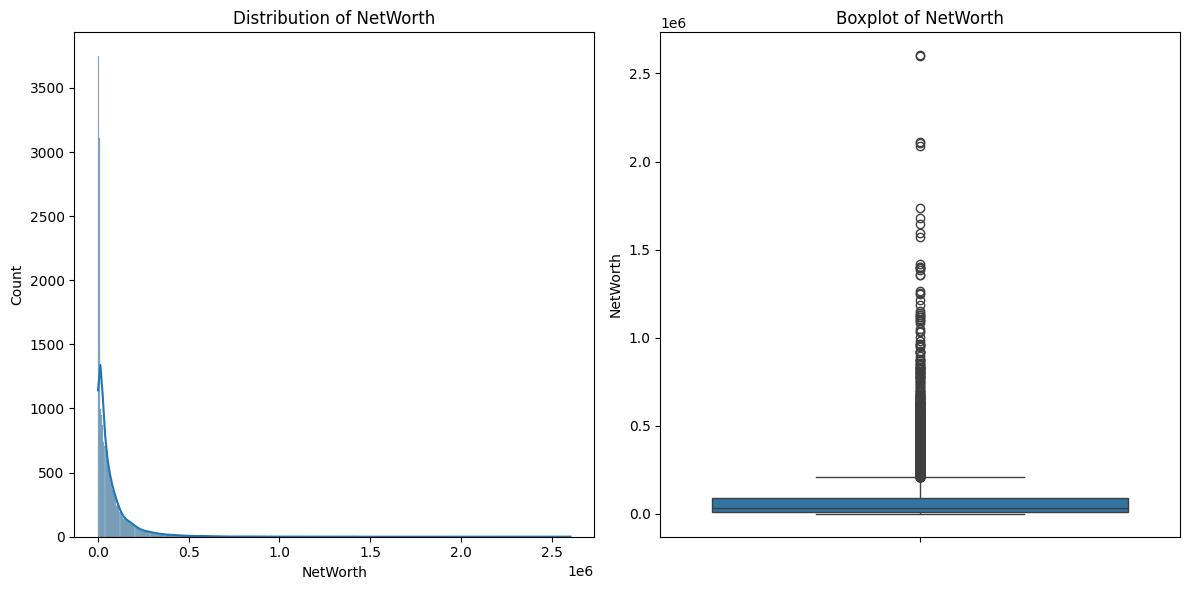

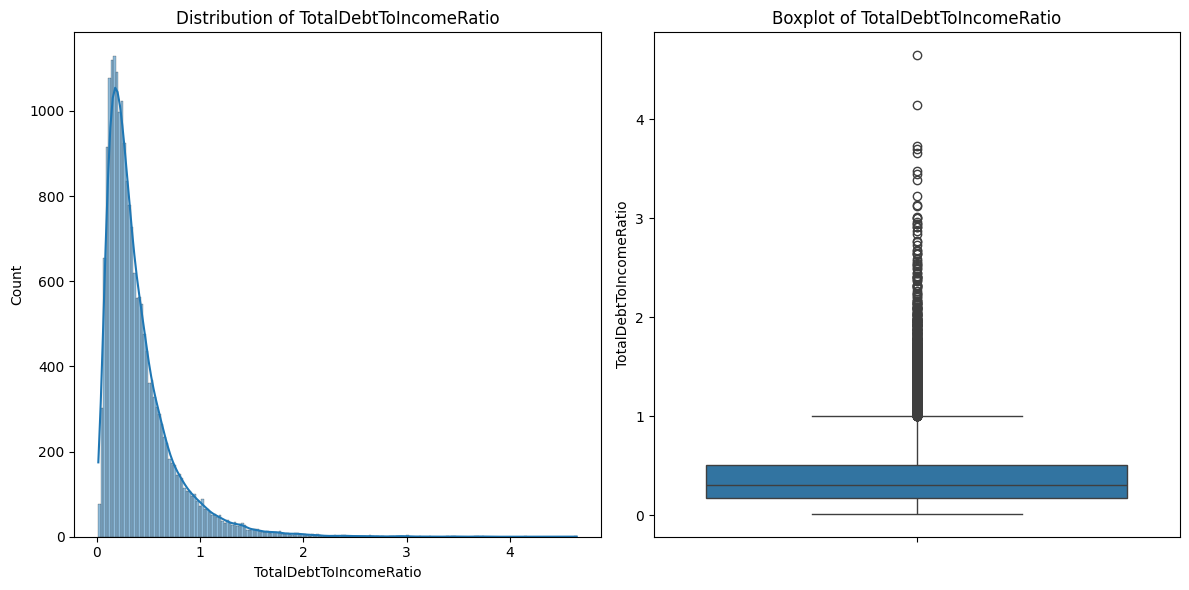

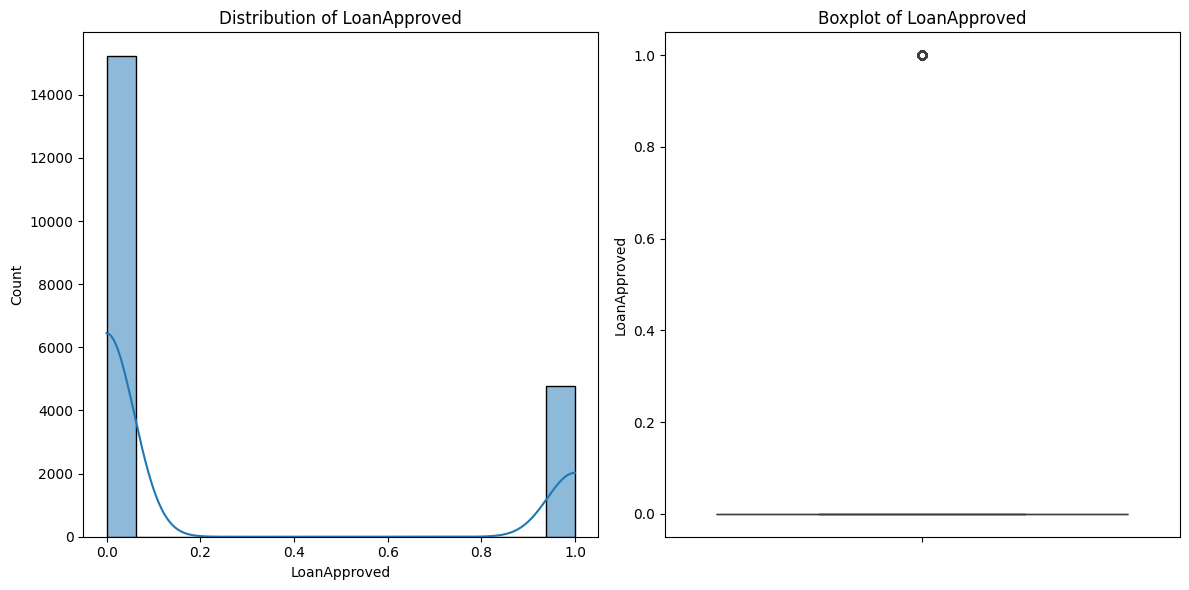

In [286]:
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')


    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [287]:
df = df[df['LoanAmount'] > 0]
df = df[df['LoanDuration'] > 0]
df = df[df['MonthlyDebtPayments'] > 0]


In [288]:
df[numerical_cols]

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,TotalDebtToIncomeRatio,LoanApproved
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.181077,0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.389852,0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,886,895,25176,128874,3393.666667,0.872241,6,5205,0.462157,0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.313098,0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.070210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,36,3,673,0.101288,5,...,235,3429,80969,25642,2515.000000,0.826217,1,55327,0.627741,0
19996,56,49246,567,33,25818,36,5,414,0.471818,2,...,6910,183,69571,5569,4103.833333,0.816618,3,64002,0.334418,0
19997,44,48958,645,20,37033,72,3,512,0.216596,3,...,2175,746,108316,4653,4079.833333,0.887216,3,103663,0.357227,0
19998,60,41025,560,36,14760,72,3,986,0.364758,4,...,3037,260,22085,11485,3418.750000,0.843787,5,10600,0.408678,0


In [289]:
num_cols = ['LoanAmount', 'MonthlyDebtPayments', 'AnnualIncome', 'SavingsAccountBalance', 'MonthlyIncome', 'TotalDebtToIncomeRatio','CreditScore', 'CreditCardUtilizationRate' ,'UtilityBillsPaymentHistory','TotalLiabilities','CheckingAccountBalance','TotalAssets','NetWorth']

for col in num_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

for col in num_cols:
    df[col] = np.log1p(df[col])


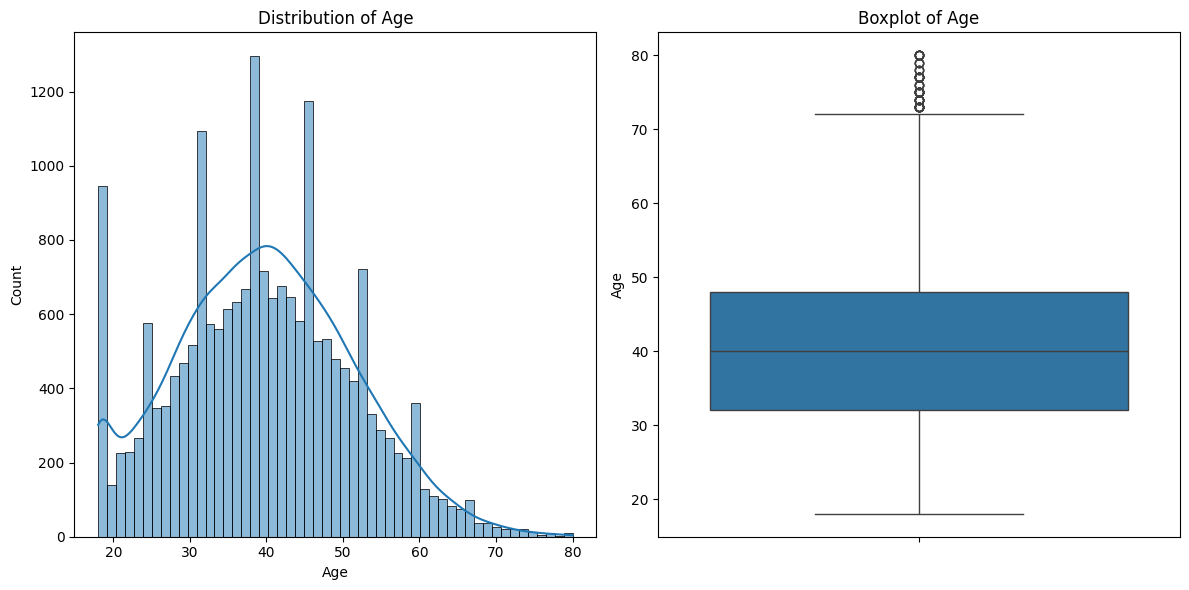

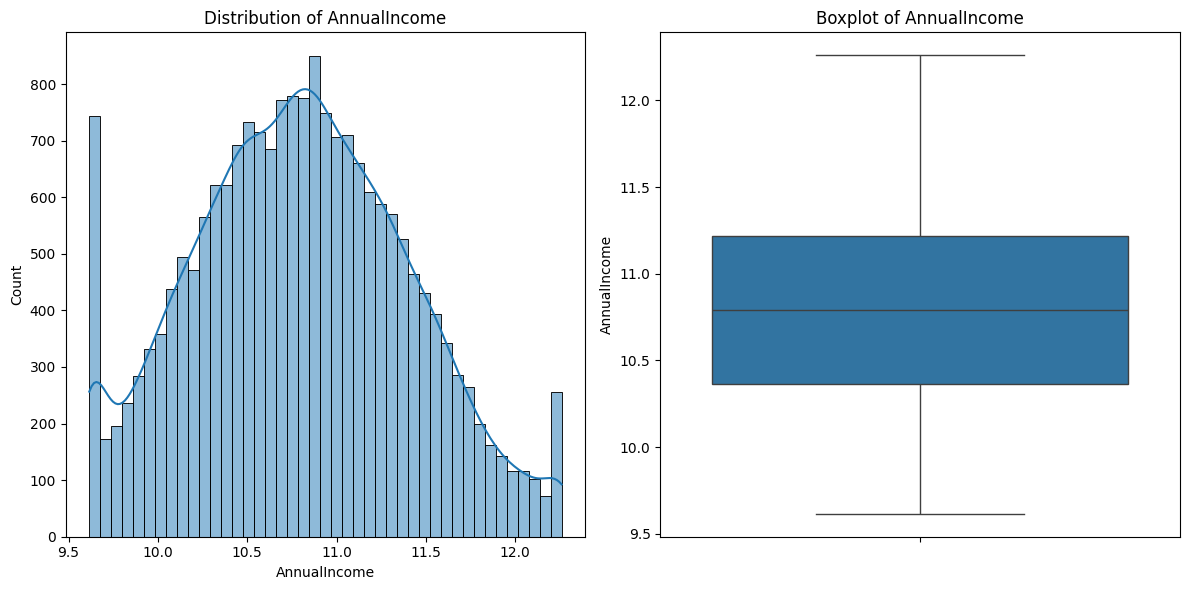

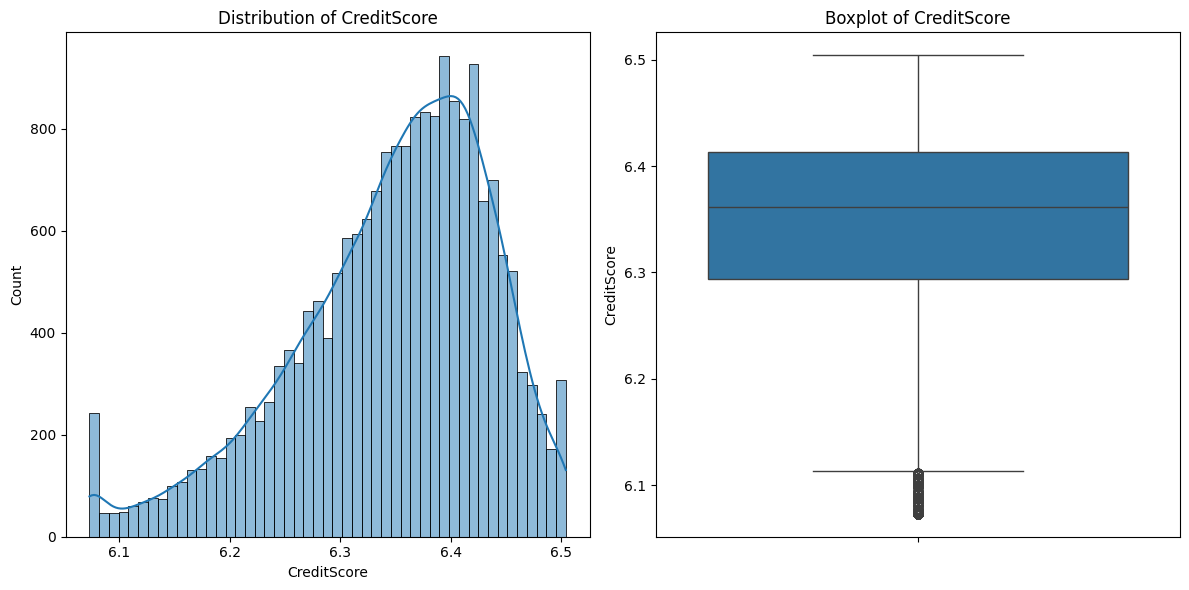

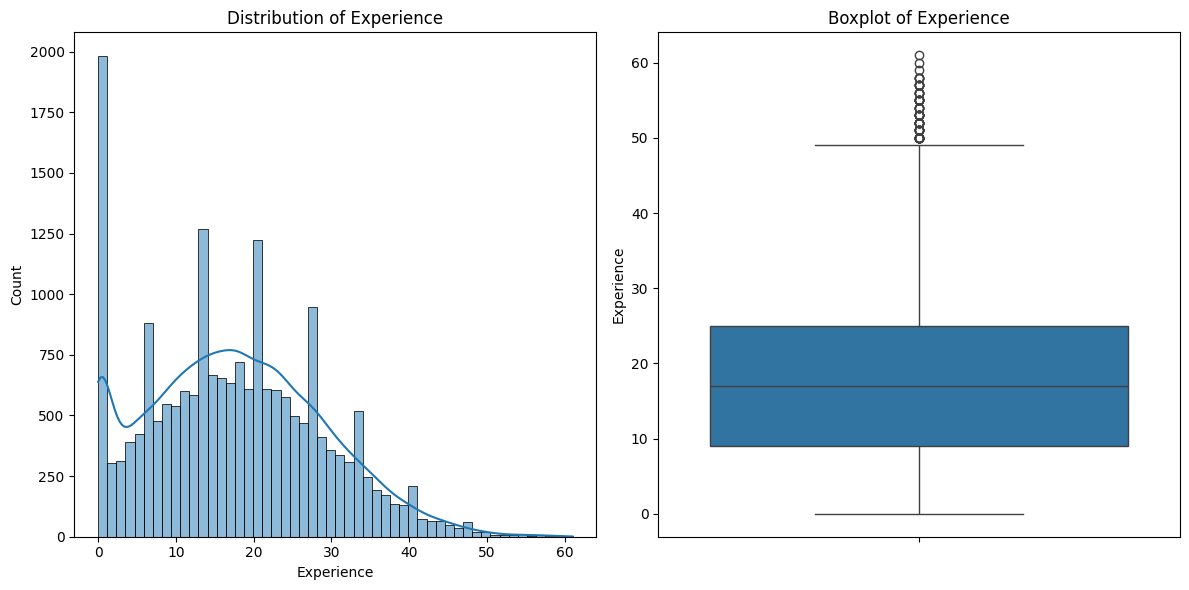

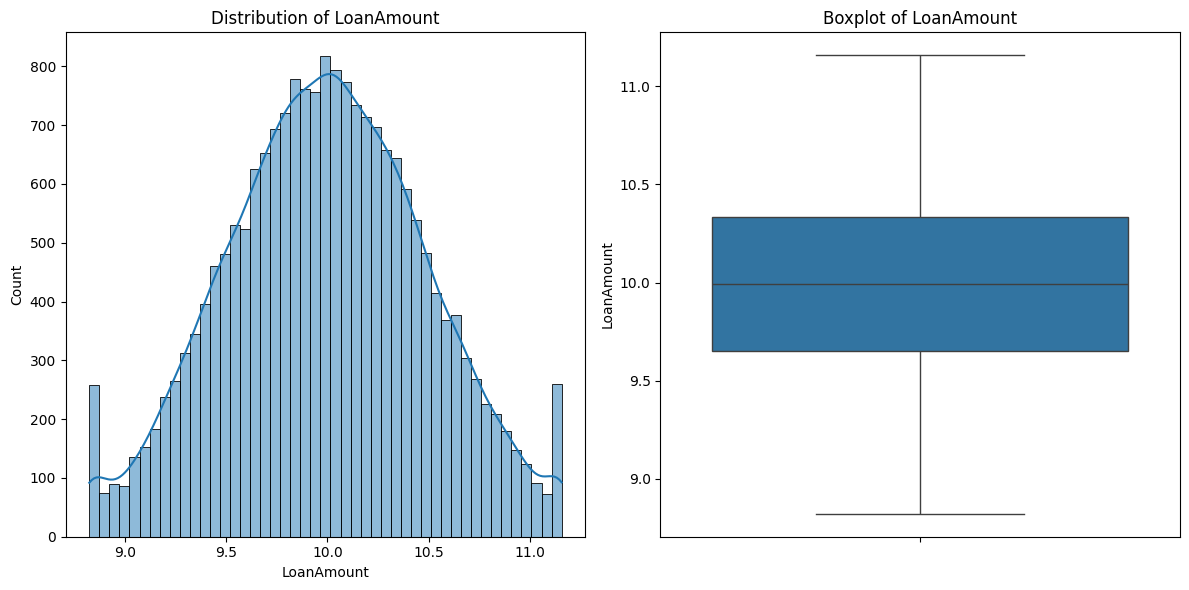

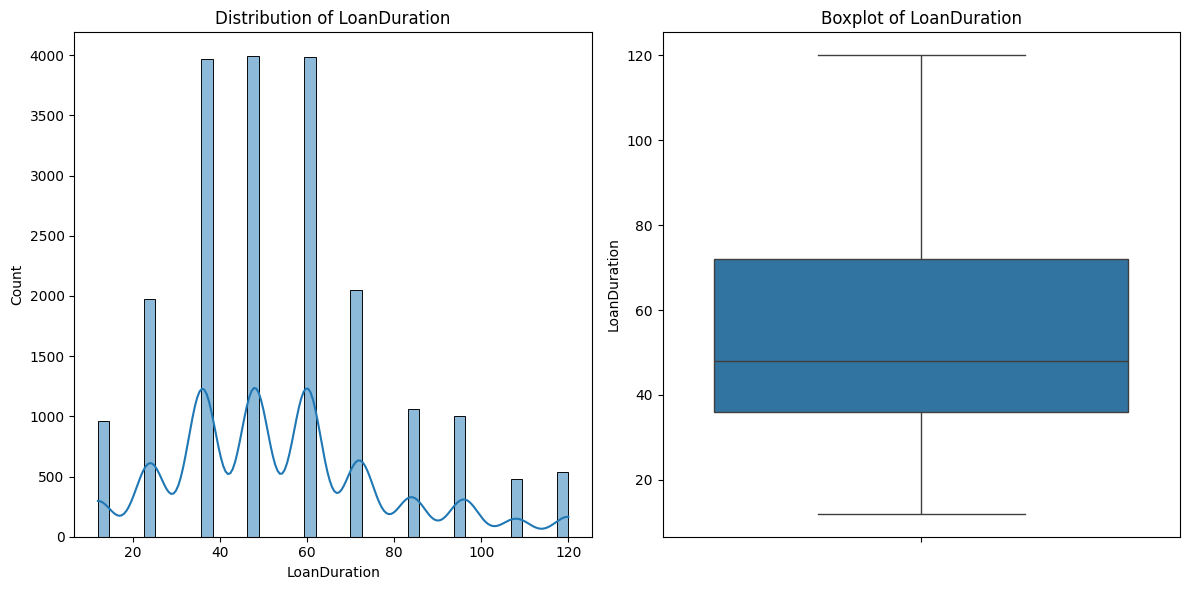

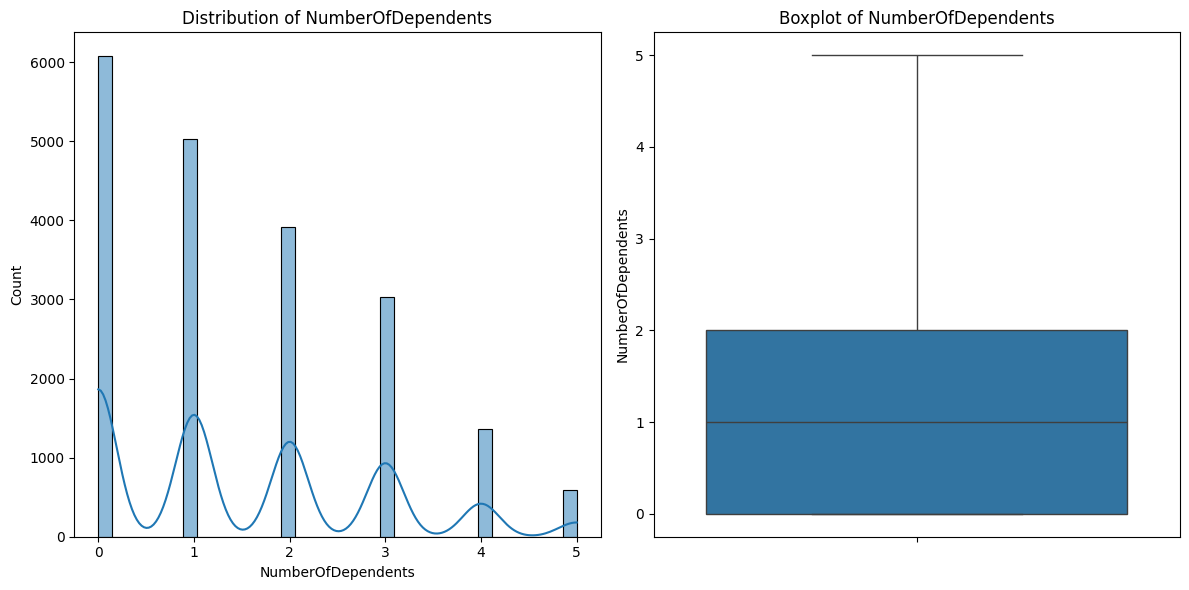

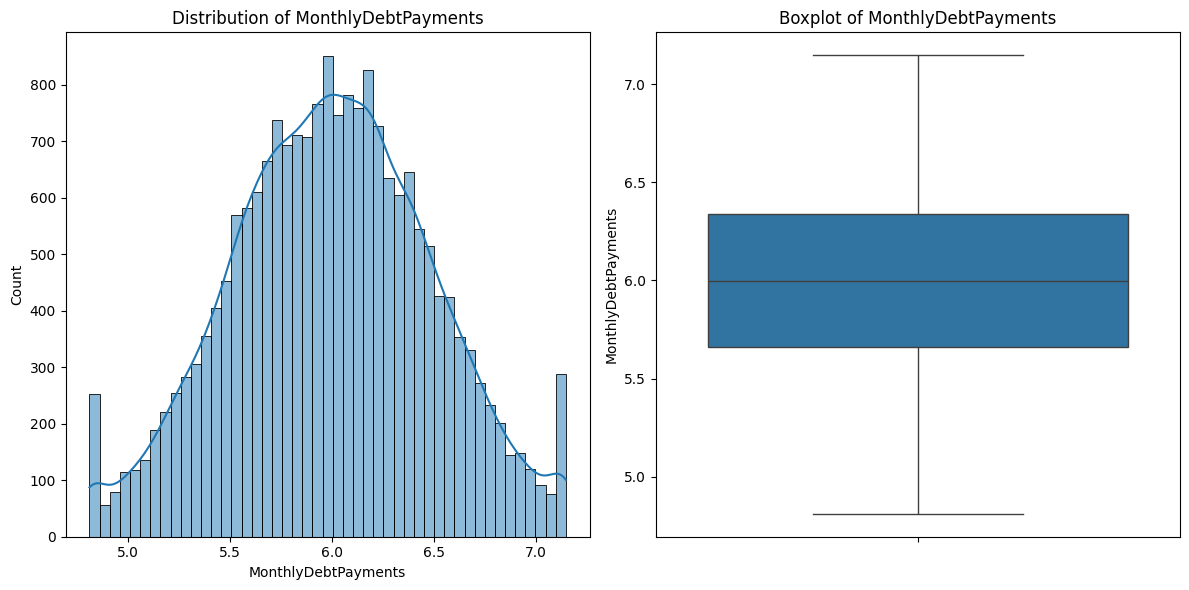

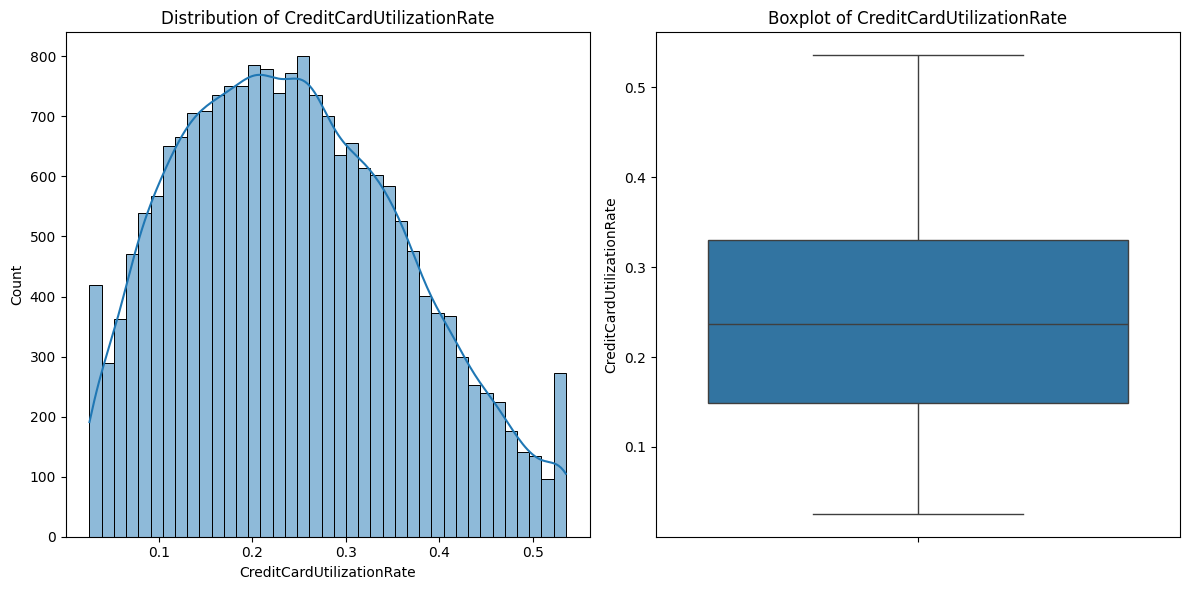

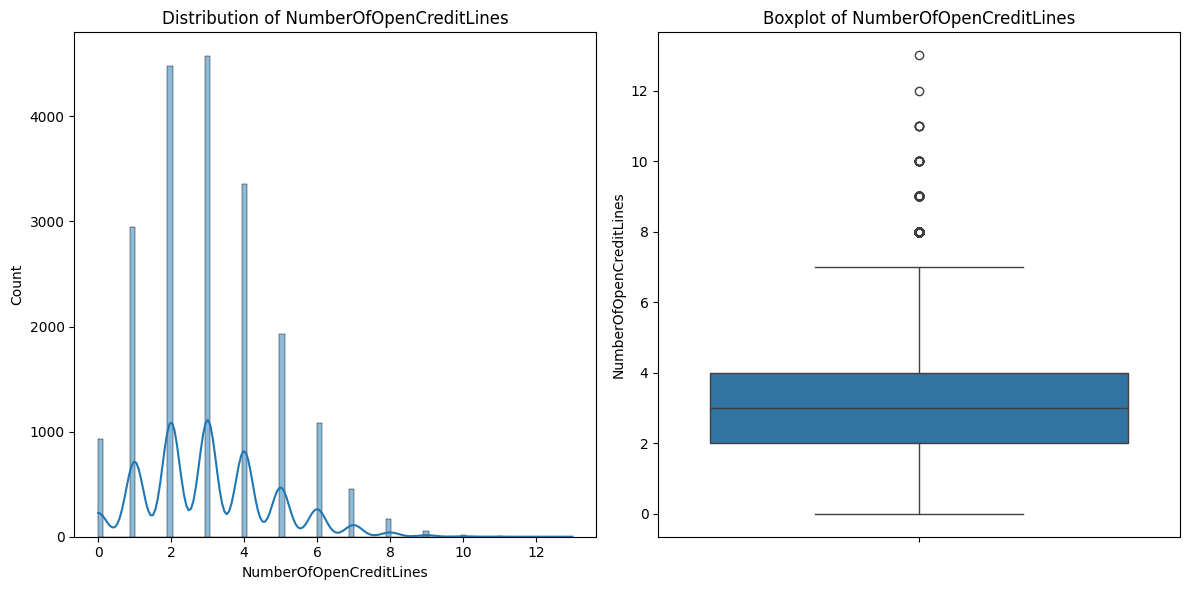

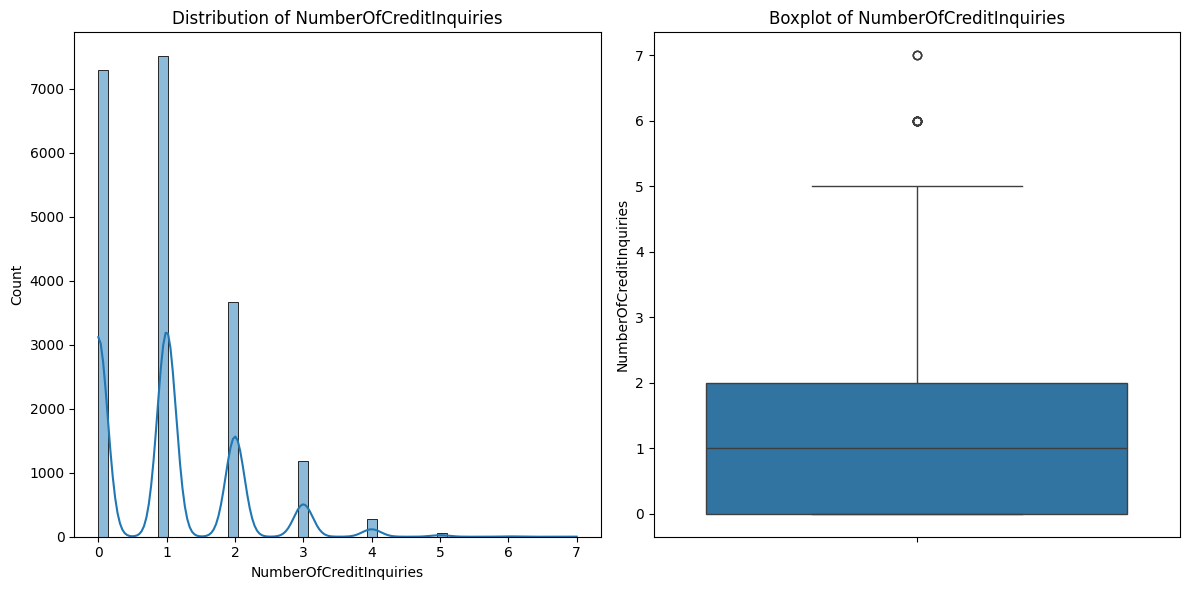

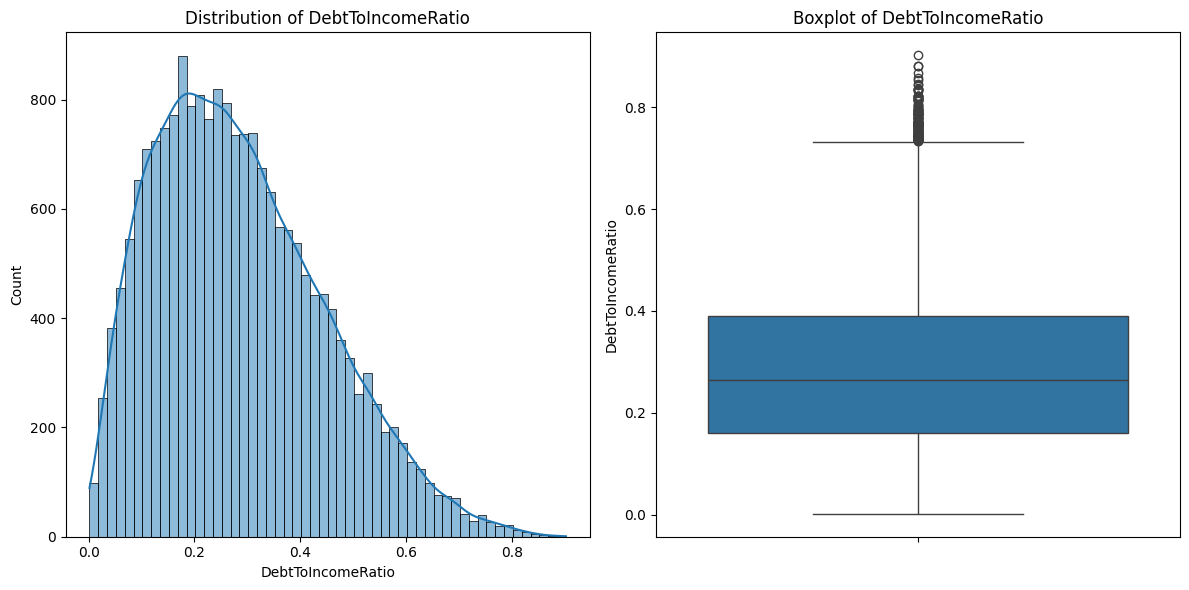

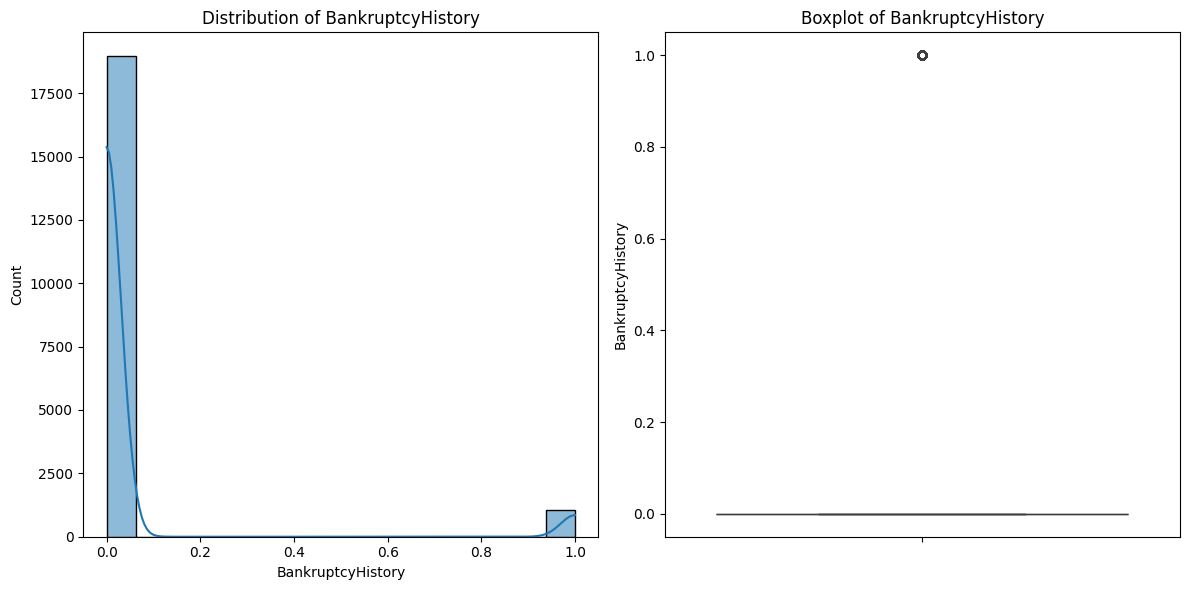

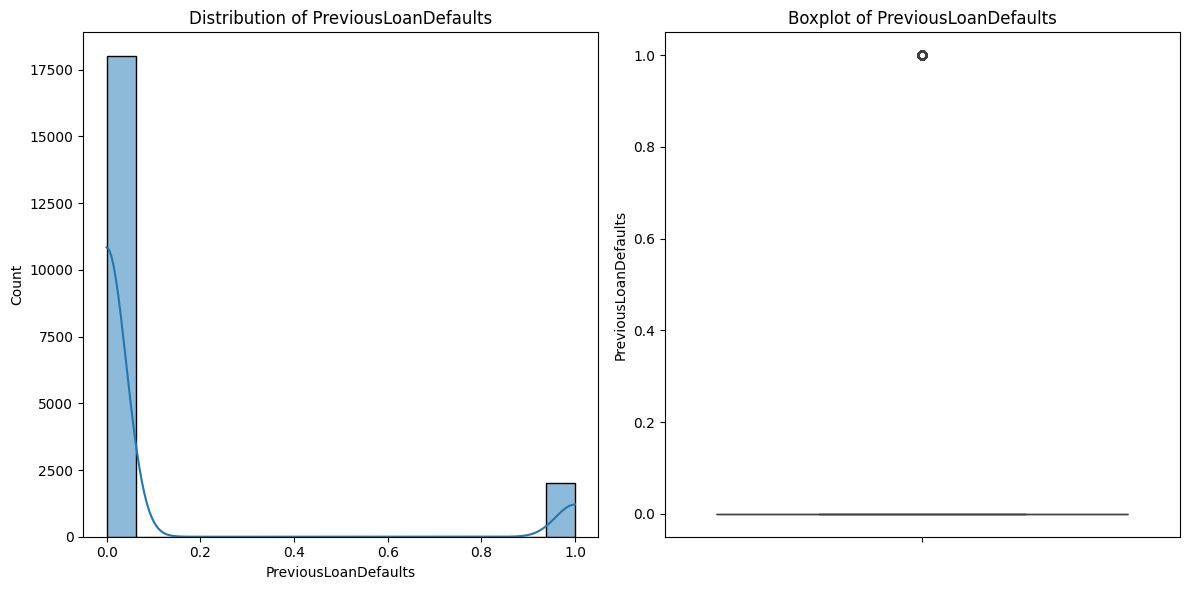

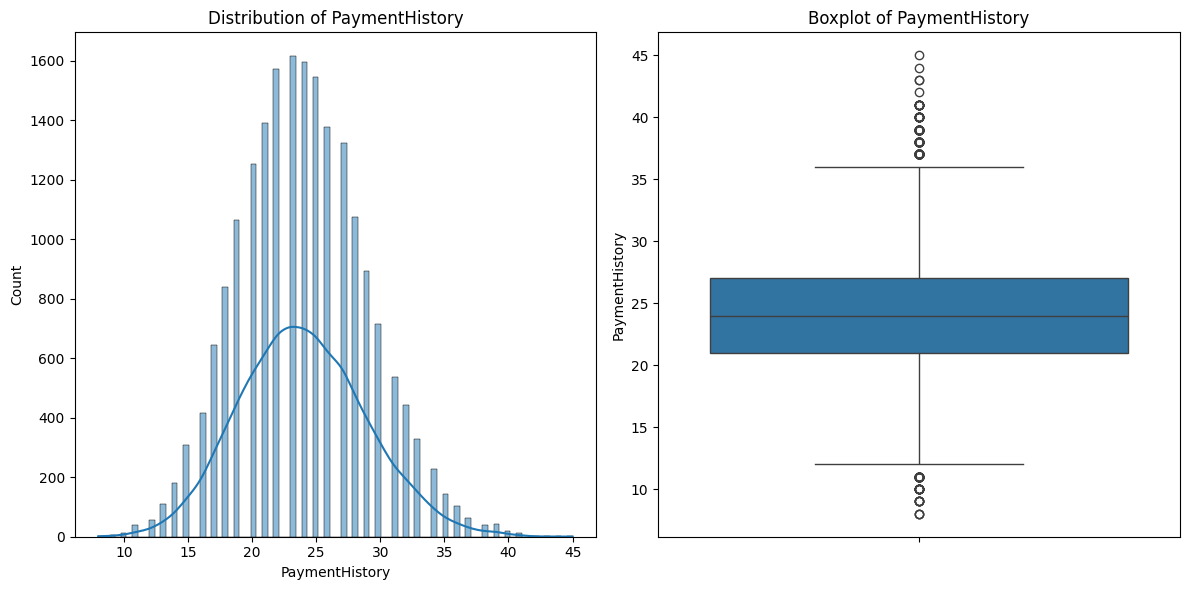

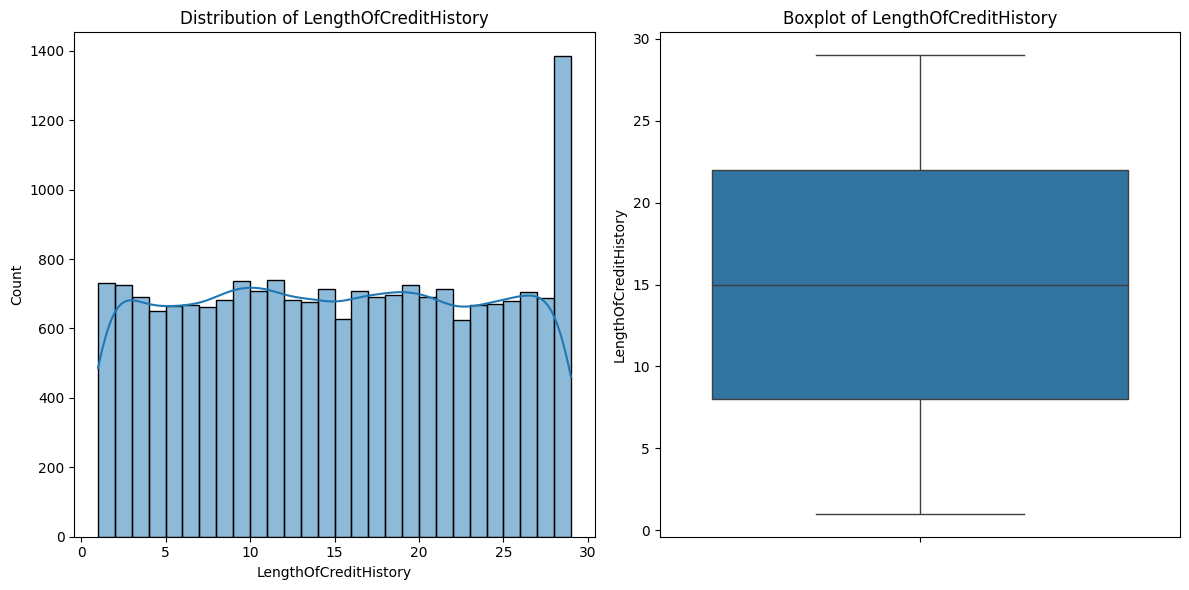

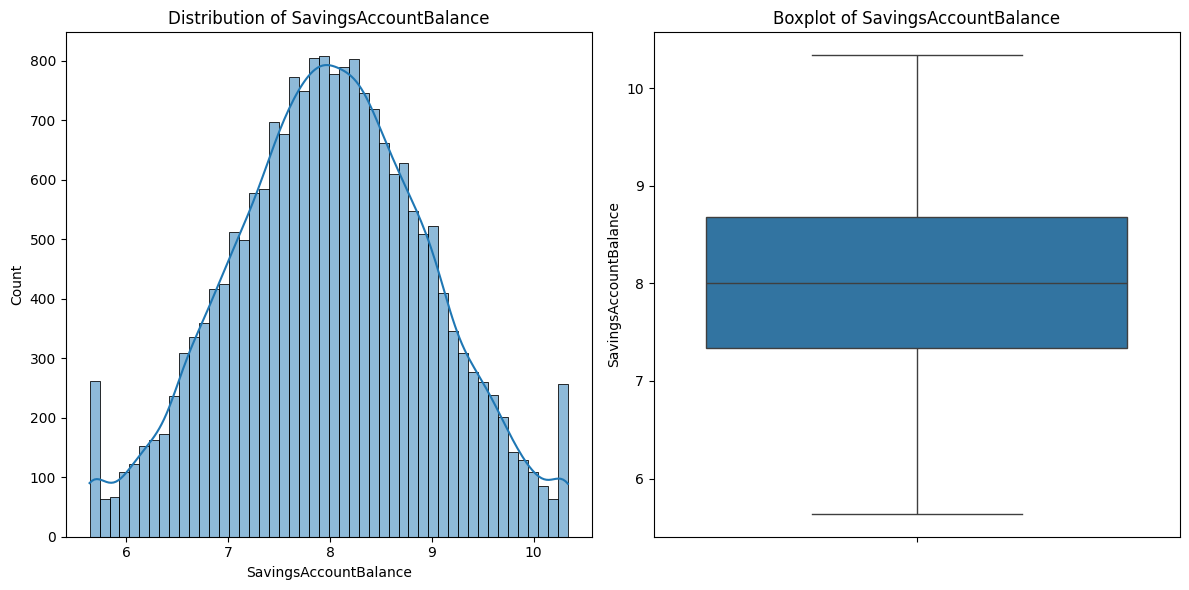

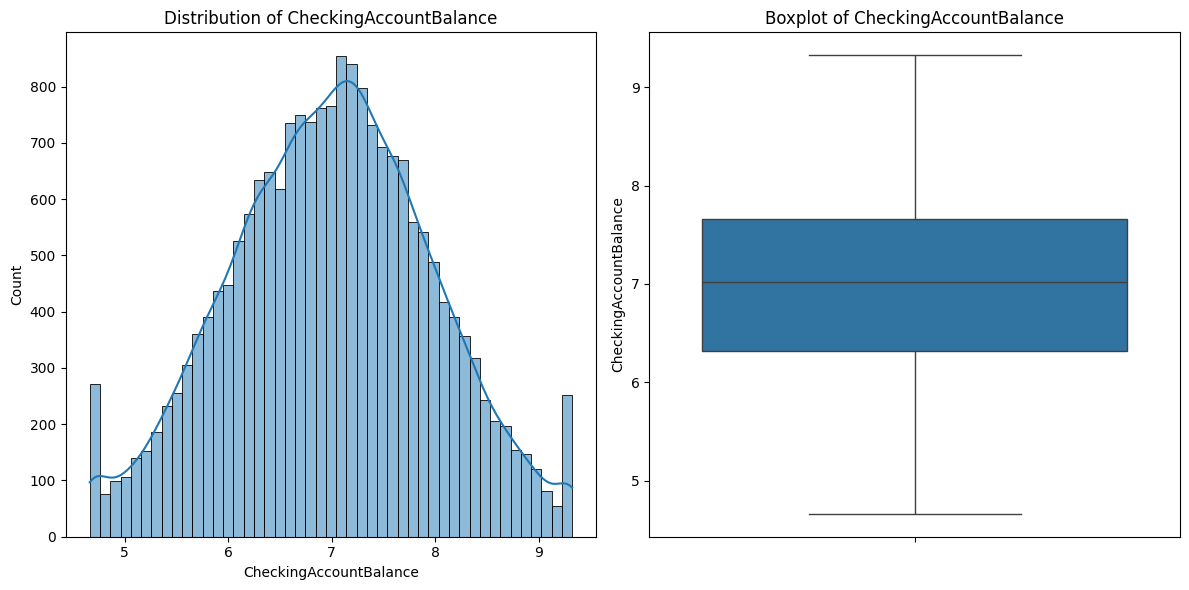

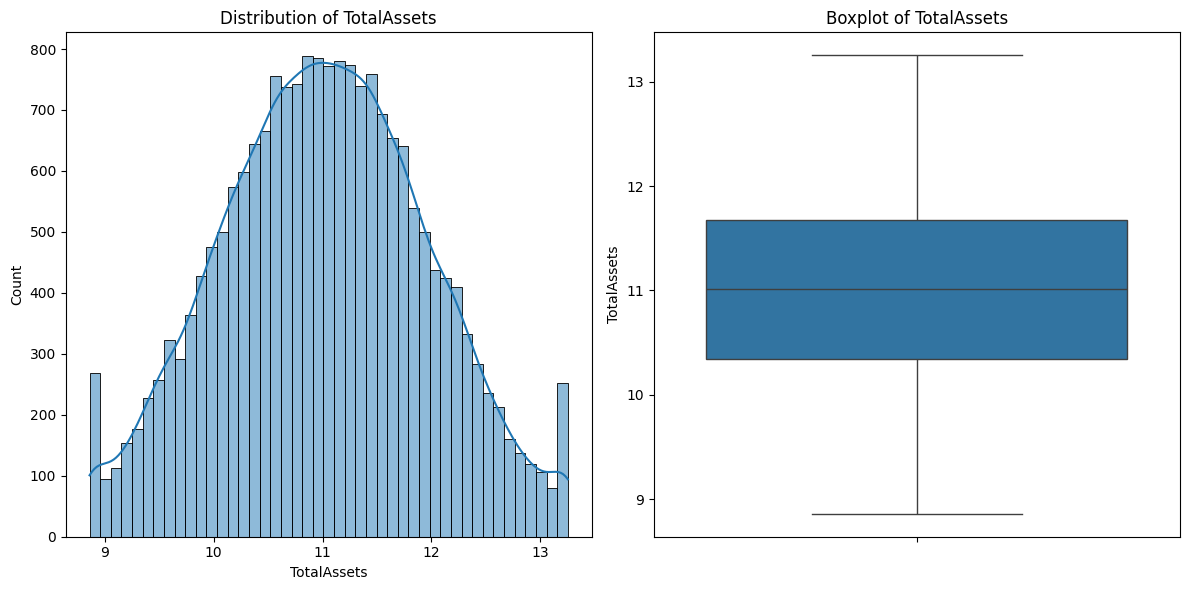

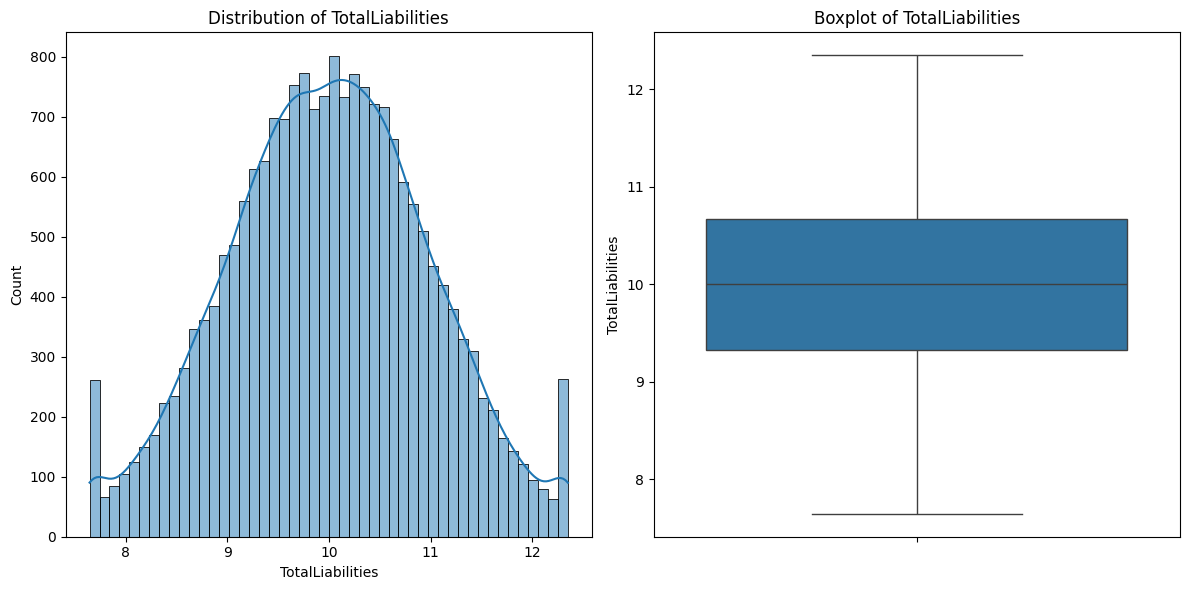

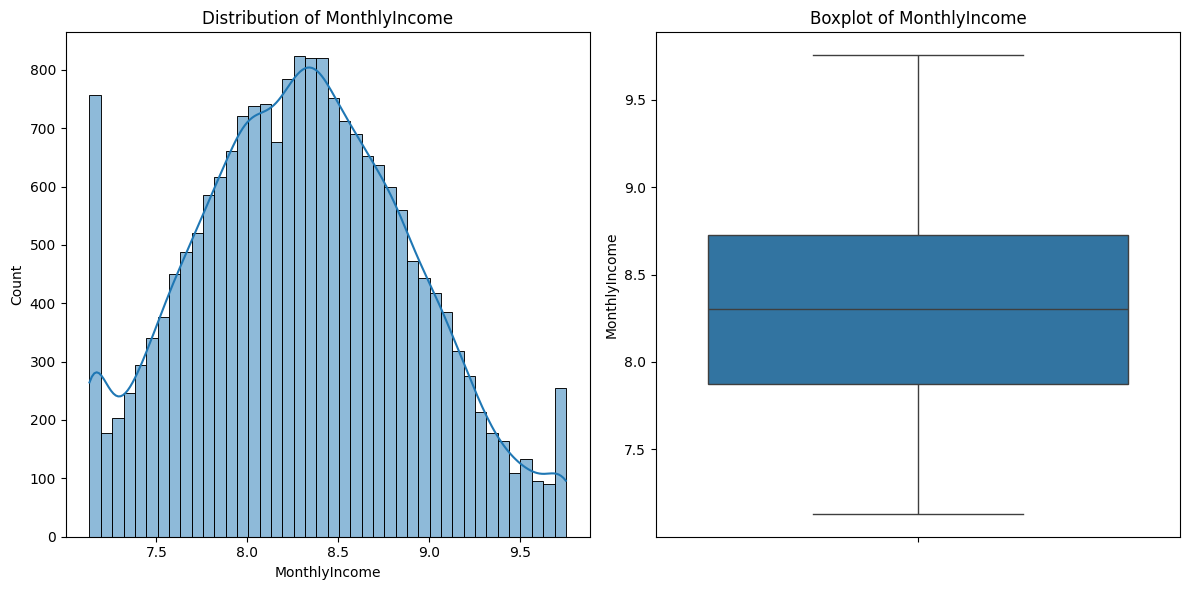

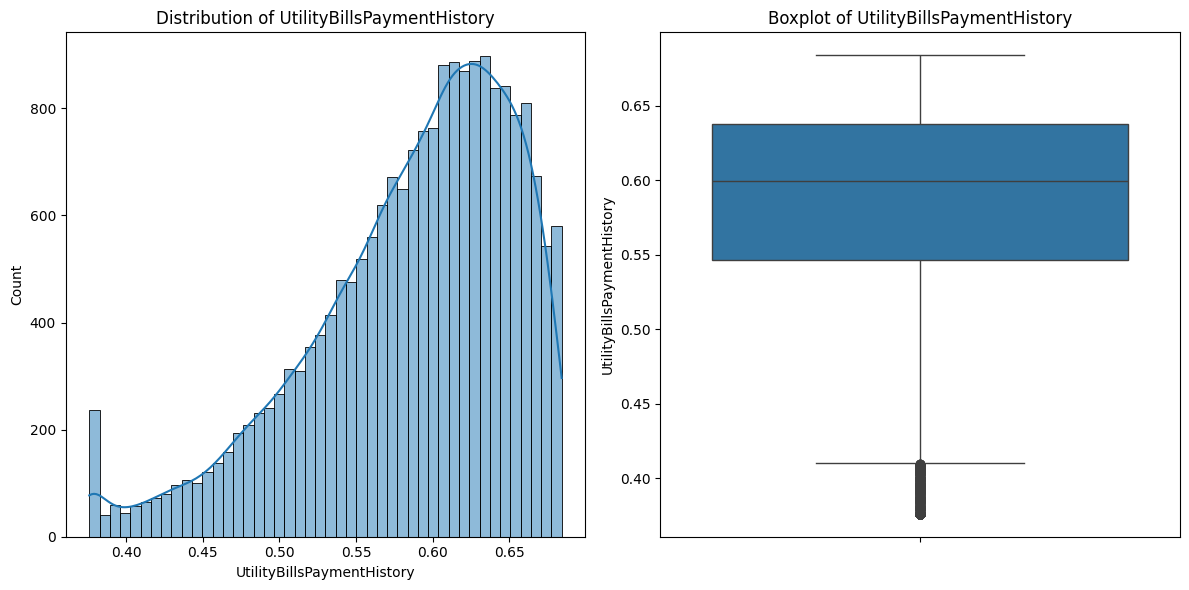

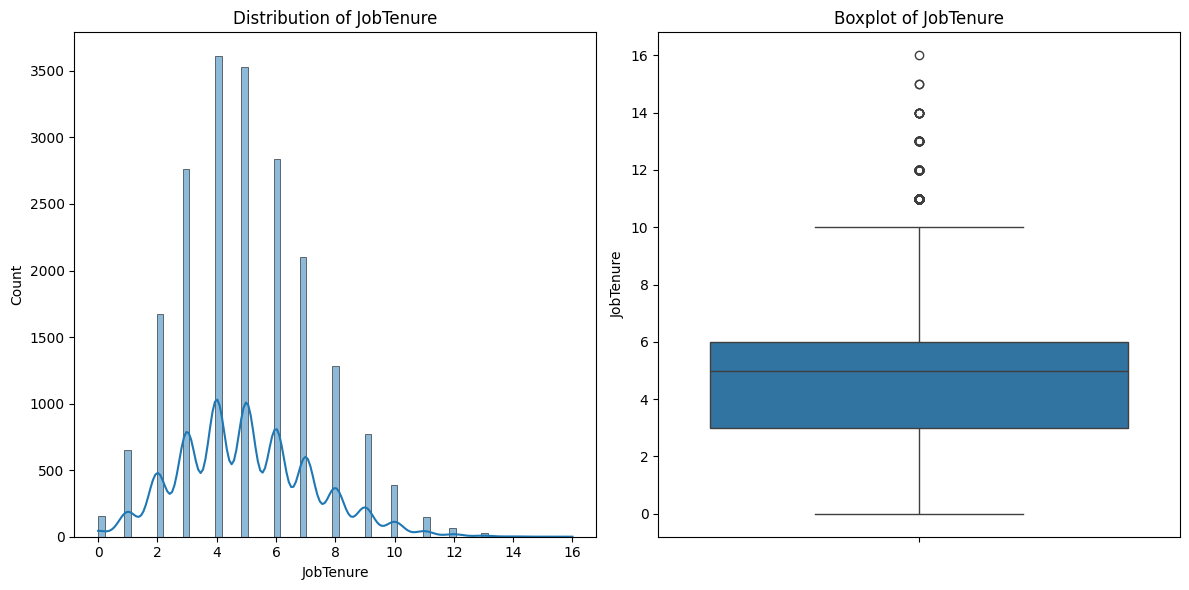

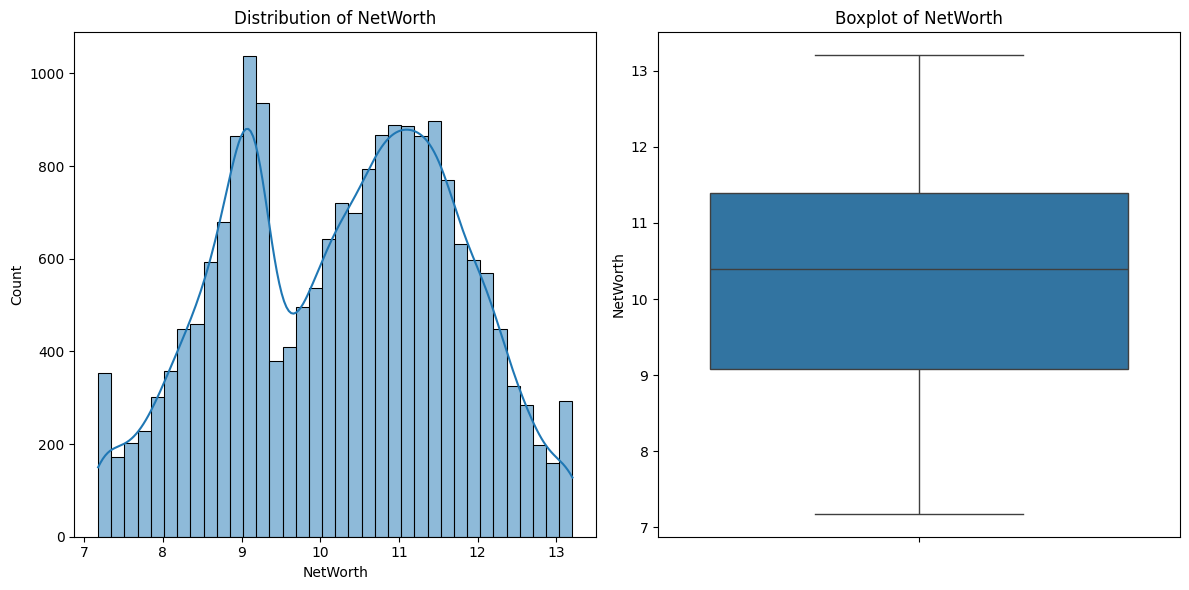

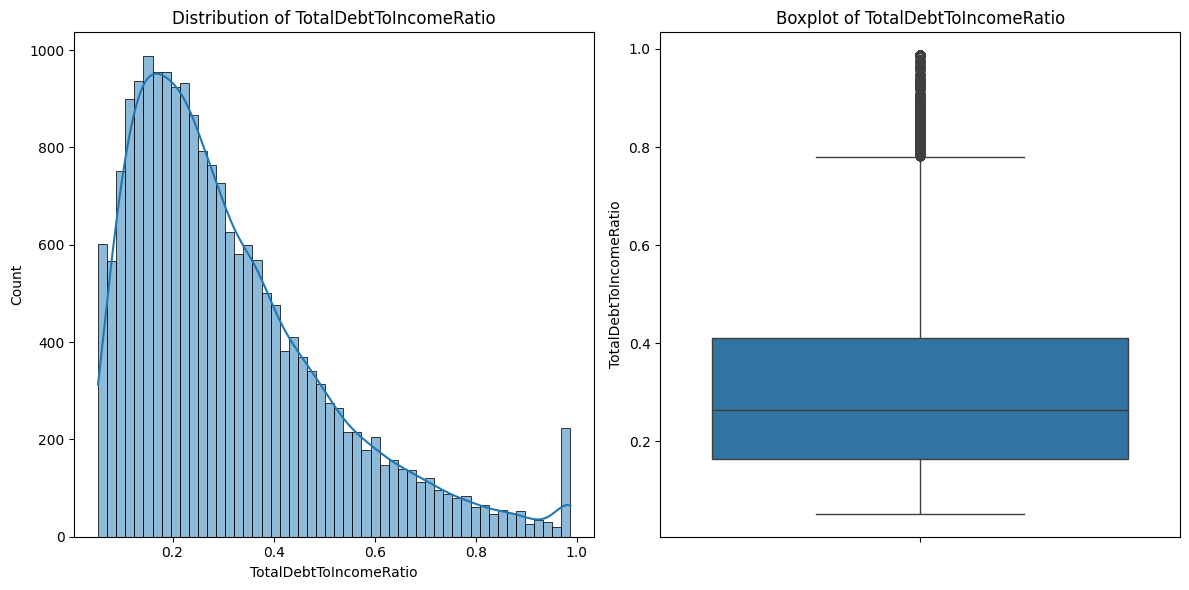

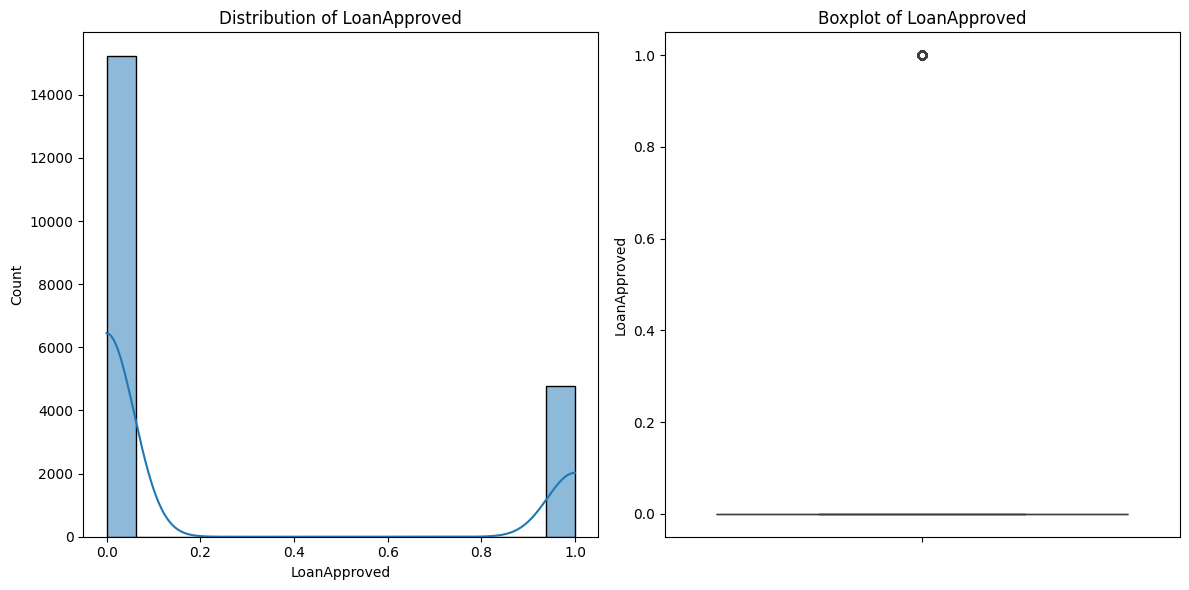

In [290]:
for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')


    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

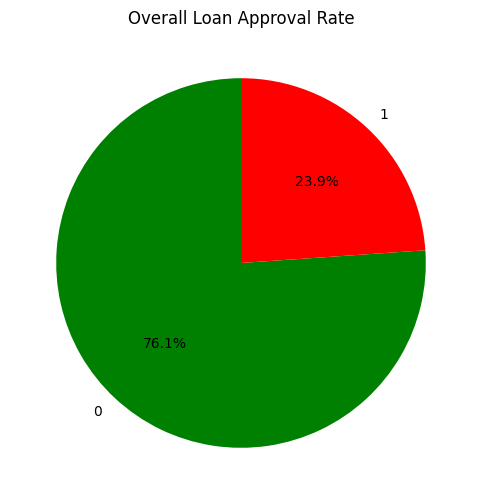

In [291]:
approval_counts = df['LoanApproved'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(approval_counts, labels=approval_counts.index, autopct='%1.1f%%', startangle=90, colors=['green','red'])
plt.title("Overall Loan Approval Rate")
plt.show()

/tmp/ipython-input-3995162748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=employment_rate.index, y=employment_rate.values, palette="Blues_d")


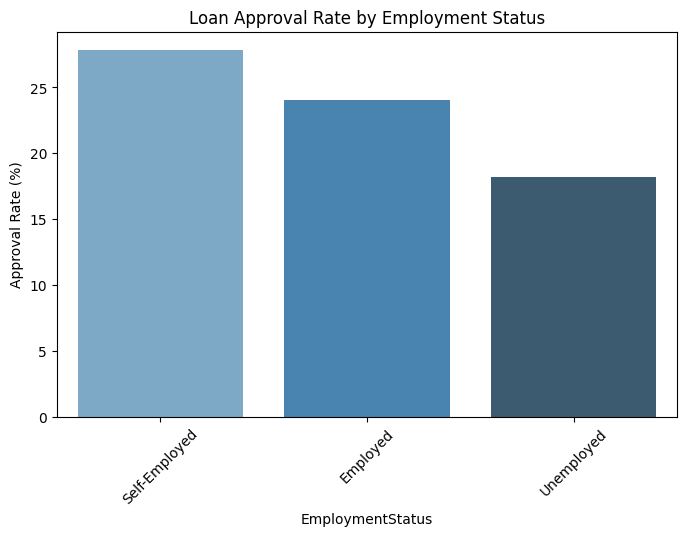

In [292]:
employment_rate = df.groupby('EmploymentStatus')['LoanApproved'].mean() * 100
employment_rate = employment_rate.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=employment_rate.index, y=employment_rate.values, palette="Blues_d")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval Rate by Employment Status")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1651273738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_rate.index, y=education_rate.values, palette="Greens_d")


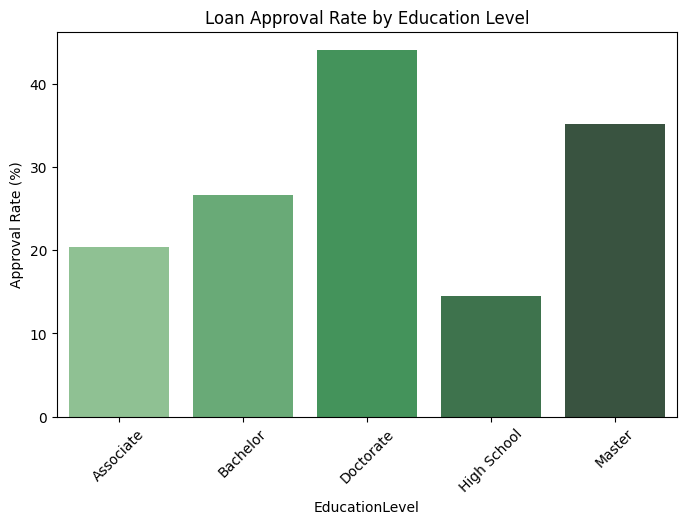

In [293]:
education_rate = df.groupby('EducationLevel')['LoanApproved'].mean() * 100

plt.figure(figsize=(8,5))
sns.barplot(x=education_rate.index, y=education_rate.values, palette="Greens_d")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval Rate by Education Level")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2853017918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_rate.index, y=home_rate.values, palette="Oranges_d")


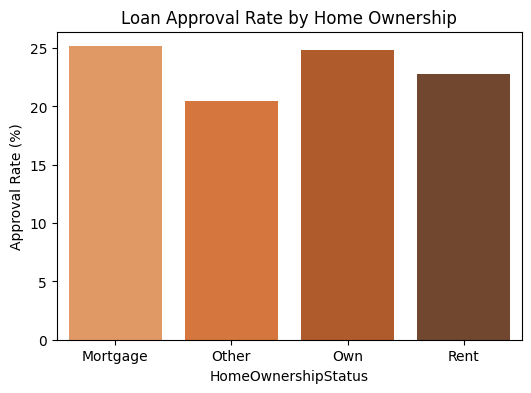

In [294]:
home_rate = df.groupby('HomeOwnershipStatus')['LoanApproved'].mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=home_rate.index, y=home_rate.values, palette="Oranges_d")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval Rate by Home Ownership")
plt.show()


/tmp/ipython-input-1020246840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_rate.index, y=purpose_rate.values, palette="Purples_d")


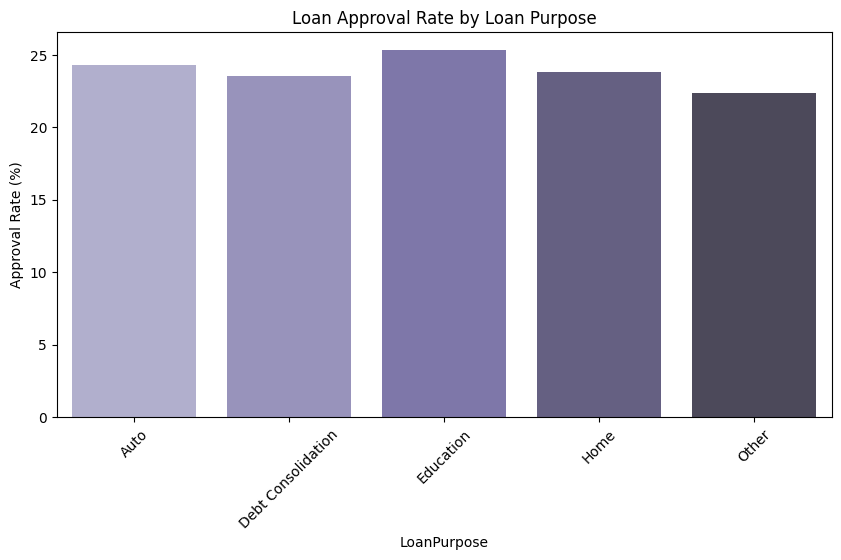

In [295]:
purpose_rate = df.groupby('LoanPurpose')['LoanApproved'].mean() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=purpose_rate.index, y=purpose_rate.values, palette="Purples_d")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval Rate by Loan Purpose")
plt.xticks(rotation=45)
plt.show()


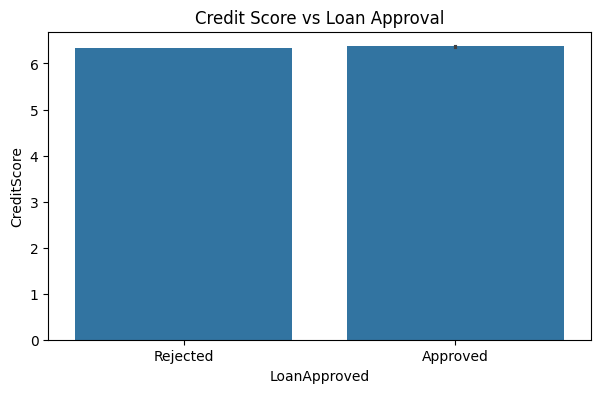

In [296]:
plt.figure(figsize=(7,4))
sns.barplot(x='LoanApproved', y='CreditScore', data=df)
plt.title("Credit Score vs Loan Approval")
plt.xticks([0,1], ['Rejected','Approved'])
plt.show()


/tmp/ipython-input-3378000590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LoanApproved', y='TotalDebtToIncomeRatio', data=df, palette=["red","green"])


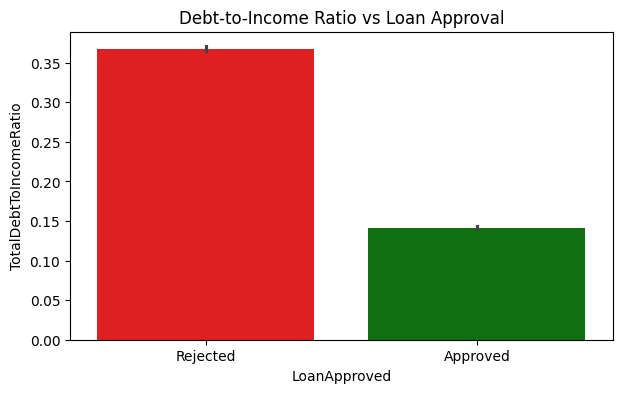

In [297]:
plt.figure(figsize=(7,4))
sns.barplot(x='LoanApproved', y='TotalDebtToIncomeRatio', data=df, palette=["red","green"])
plt.title("Debt-to-Income Ratio vs Loan Approval")
plt.xticks([0,1], ['Rejected','Approved'])
plt.show()


/tmp/ipython-input-482147632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=defaults_rate.index, y=defaults_rate.values, palette="Reds_d")


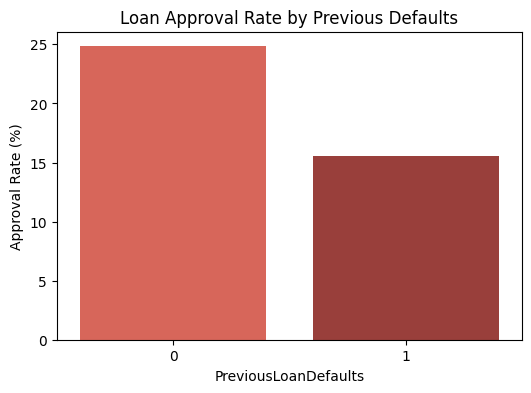

In [298]:
defaults_rate = df.groupby('PreviousLoanDefaults')['LoanApproved'].mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=defaults_rate.index, y=defaults_rate.values, palette="Reds_d")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval Rate by Previous Defaults")
plt.show()


In [299]:
df[numerical_cols]

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,TotalDebtToIncomeRatio,LoanApproved
0,45,10.595359,6.426488,22,9.484405,48,2,5.214936,0.303372,1,...,8.940236,7.092574,11.892129,9.861832,8.110728,0.545211,11,11.751383,0.166427,0
1,38,10.589358,6.444131,15,10.167619,48,1,6.208590,0.084182,5,...,8.439880,8.149313,10.881908,9.169102,8.104729,0.660176,3,10.683042,0.329198,0
2,47,10.614597,6.347389,26,9.777244,36,2,6.805723,0.128757,2,...,6.787845,6.797940,10.133686,11.766598,8.129961,0.627136,6,8.557567,0.379913,0
3,58,11.143093,6.302619,34,10.542680,96,1,6.628041,0.237115,2,...,7.424165,7.104965,11.560028,8.588769,8.658345,0.639828,5,11.507440,0.272389,0
4,37,11.545054,6.388561,17,9.125327,36,1,5.616771,0.278037,0,...,7.349874,8.513587,12.406177,9.757710,9.060254,0.663393,5,12.332793,0.067855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,10.314968,6.376727,19,10.107326,36,3,6.513230,0.096480,5,...,5.638319,8.140316,11.301834,10.152026,7.830426,0.602247,1,10.921034,0.487193,0
19996,56,10.804604,6.342121,33,10.158866,36,5,6.028279,0.386498,2,...,8.840870,5.214936,11.150117,8.625150,8.319920,0.596977,3,11.066685,0.288495,0
19997,44,10.798738,6.470800,20,10.519592,72,3,6.240276,0.196057,3,...,7.685244,6.616065,11.592817,8.445482,8.314056,0.635103,3,11.548910,0.305444,0
19998,60,10.621961,6.329721,36,9.599744,72,3,6.894670,0.310977,4,...,8.018955,5.564520,10.002699,9.348884,8.137323,0.611822,5,9.268704,0.342652,0


In [300]:
df[categorical_cols]

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,Employed,Master,Married,Own,Home
1,Employed,Associate,Single,Mortgage,Debt Consolidation
2,Employed,Bachelor,Married,Rent,Education
3,Employed,High School,Single,Mortgage,Home
4,Employed,Associate,Married,Mortgage,Debt Consolidation
...,...,...,...,...,...
19995,Employed,High School,Married,Rent,Auto
19996,Employed,Associate,Married,Rent,Debt Consolidation
19997,Employed,Bachelor,Married,Mortgage,Home
19998,Employed,High School,Married,Own,Debt Consolidation


LoanApproved                  1.000000
MonthlyIncome                 0.578539
AnnualIncome                  0.576316
TotalAssets                   0.143995
NetWorth                      0.143450
Age                           0.141029
Experience                    0.140755
CreditScore                   0.137808
LengthOfCreditHistory         0.105949
PaymentHistory                0.030804
SavingsAccountBalance         0.009129
CheckingAccountBalance        0.007371
JobTenure                     0.004997
UtilityBillsPaymentHistory    0.003094
NumberOfDependents            0.001717
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
NumberOfCreditInquiries      -0.005885
CreditCardUtilizationRate    -0.010135
TotalLiabilities             -0.033570
PreviousLoanDefaults         -0.065343
BankruptcyHistory            -0.070751
MonthlyDebtPayments          -0.071549
LoanDuration                 -0.094558
LoanAmount                   -0.260266
TotalDebtToIncomeRatio   

/tmp/ipython-input-1469930787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")


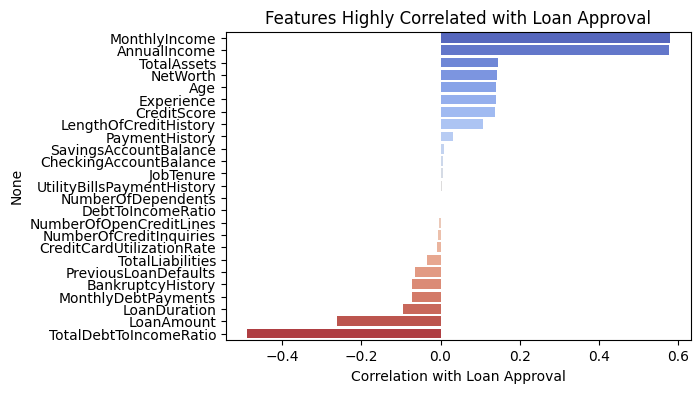

In [301]:
corr_matrix = df[numerical_cols].corr()
loan_corr = corr_matrix['LoanApproved'].sort_values(ascending=False)
print(loan_corr)
top_corr = loan_corr.drop('LoanApproved')

plt.figure(figsize=(6,4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="coolwarm")
plt.xlabel("Correlation with Loan Approval")
plt.title("Features Highly Correlated with Loan Approval")
plt.show()


['LoanApproved', 'AnnualIncome', 'MonthlyIncome', 'NetWorth', 'Age', 'Experience', 'TotalAssets', 'CreditScore', 'LengthOfCreditHistory', 'LoanAmount', 'TotalDebtToIncomeRatio']


In [302]:
education_order = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df['EducationLevel'] = df['EducationLevel'].map(education_order)


In [303]:
categorical_ohe_cols = [
    'EmploymentStatus',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'LoanPurpose'
]

df = pd.get_dummies(
    df,
    columns=categorical_ohe_cols,
    drop_first=True
)


In [304]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
Age,45,38,47,58,37,37,58,49,34,46,...,54,34,50,50,51,44,56,44,60,20
AnnualIncome,10.595359,10.589358,10.614597,11.143093,11.545054,12.091284,10.84449,11.486027,11.668578,10.611917,...,11.47486,11.009307,10.442405,10.328069,10.414963,10.314968,10.804604,10.798738,10.621961,10.88234
CreditScore,6.426488,6.444131,6.347389,6.302619,6.388561,6.440947,6.336826,6.248043,6.403574,6.418365,...,6.43294,6.320768,6.361302,6.378426,6.33328,6.376727,6.342121,6.4708,6.329721,6.35437
EducationLevel,3.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0,...,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0
Experience,22,15,26,34,17,16,39,23,12,19,...,28,10,27,29,30,19,33,20,36,0
LoanAmount,9.484405,10.167619,9.777244,10.54268,9.125327,9.644328,9.452659,9.885069,10.921504,10.144235,...,10.546183,9.332558,10.257308,9.592537,10.002563,10.107326,10.158866,10.519592,9.599744,10.37524
LoanDuration,48,48,36,96,36,72,48,12,60,12,...,48,60,48,48,36,36,36,72,72,48
NumberOfDependents,2,1,2,1,1,0,0,5,5,4,...,2,3,3,0,1,3,5,3,3,0
MonthlyDebtPayments,5.214936,6.20859,6.805723,6.628041,5.616771,6.597146,5.823046,5.666427,6.459904,6.558198,...,5.834811,6.021023,6.077642,4.927254,5.252273,6.51323,6.028279,6.240276,6.89467,5.609472
CreditCardUtilizationRate,0.303372,0.084182,0.128757,0.237115,0.278037,0.097318,0.312897,0.190428,0.176221,0.413741,...,0.269276,0.395629,0.340397,0.44715,0.24008,0.09648,0.386498,0.196057,0.310977,0.429449


In [306]:
base_features = [
    'AnnualIncome',
    'MonthlyIncome',
    'NetWorth',
    'Age',
    'Experience',
    'TotalAssets',
    'CreditScore',
    'LengthOfCreditHistory',
    'LoanAmount',
    'TotalDebtToIncomeRatio',
    'EducationLevel'
]

encoded_cat_features = [
    col for col in df.columns
    if col.startswith((
        'EmploymentStatus_',
        'MaritalStatus_',
        'HomeOwnershipStatus_',
        'LoanPurpose_'
    ))
]


In [307]:
selected_features = base_features + encoded_cat_features


In [308]:
X = df[selected_features]
y = df['LoanApproved']


,LoanApproved
0,0
1,0
2,0
3,0
4,1
...,...
19995,0
19996,0
19997,0
19998,0
